<a href="https://colab.research.google.com/github/shravantika-29/predicting-Infant-Mortality/blob/main/Main_Project_colaborative_team_5_GLOBAL_MACRO_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

**About the dataset:**
this is the dataset showing the


## 1. Economic Factors
GDP: Gross Domestic Product

Tax revenue (%): Percentage of tax revenue relative to GDP

Minimum wage: National minimum wage

Unemployment rate: Percentage of the labor force that is unemployed

Total tax rate: Overall tax rate
economic_factor = ['GDP','Tax recenue (%)','Minimum wage','Unemployment rate','Total tax rate']
## 2. Health Outcomes
Life expectancy: Average life span of the population

Infant mortality: Number of infant deaths per 1,000 live births

Maternal mortality ratio: Number of maternal deaths per 100,000 live births

Birth Rate: Number of births per 1,000 people

Fertility Rate: Average number of children born per woman

Physicians per thousand: Number of physicians per 1,000 people

Out of pocket health expenditure: Percentage of health expenses paid out of
pocket by individuals
## 3. Educational Indicators
Gross primary education enrollment (%): Percentage of children enrolled in
primary education

Gross tertiary education enrollment (%): Percentage of individuals enrolled in
tertiary education
## 4. Environmental Indicators
Co2 Emissions: Amount of carbon dioxide emissions

Forested Area (%): Percentage of land area covered by forests

Gasoline Price: Cost of gasoline per liter

Urban population: Percentage of the population living in urban areas

Latitude: Geographical coordinate

Longitude: Geographical coordinate
## 5. Demographic and Social Indicators
Population: Total number of people

Density (P/Km2): Population density per square kilometer

Population: Labor force participation (%): Percentage of the population
participating in the labor force

Armed Forces size: Number of individuals in the armed forces

Largest city: The largest city by population

Capital/Major City: Capital or major city

Official language: Primary language spoken

Maternal mortality ratio: Number of maternal deaths per 100,000 live births

# Data cleaning

In [ ]:
data  = pd.read_csv('world-data-2023.csv')
data.info()
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [ ]:
# Abbreviation,Calling code,Major city,largest city,official language,Latitude,Longitude. variables are removed

In [ ]:
data.duplicated().sum()

0

In [ ]:
## remove the columns
pd.set_option('display.max_columns', None)
data.drop(['Abbreviation','Capital/Major City','Currency-Code','Largest city','Official language','Latitude','Longitude','Calling Code'], axis=1, inplace=True)
data

Country Density\n(P/Km2) Agricultural Land( %) Land Area(Km2)  \
0    Afghanistan               60                58.10%        652,230   
1        Albania              105                43.10%         28,748   
2        Algeria               18                17.40%      2,381,741   
3        Andorra              164                40.00%            468   
4         Angola               26                47.50%      1,246,700   
..           ...              ...                   ...            ...   
190    Venezuela               32                24.50%        912,050   
191      Vietnam              314                39.30%        331,210   
192        Yemen               56                44.60%        527,968   
193       Zambia               25                32.10%        752,618   
194     Zimbabwe               38                41.90%        390,757   

    Armed Forces size  Birth Rate Co2-Emissions       CPI CPI Change (%)  \
0             323,000       32.49         8,672     149.9          2.30%   
1               9,000       11.78         4,536    119.05          1.40%   
2             317,000       24.28       150,006    151.36          2.00%   
3                 NaN        7.20           469       NaN            NaN   
4             117,000       40.73        34,693    261.73         17.10%   
..                ...         ...           ...       ...            ...   
190           343,000       17.88       164,175  2,740.27        254.90%   
191           522,000       16.75       192,668    163.52          2.80%   
192            40,000       30.45        10,609    157.58          8.10%   
193            16,000       36.19         5,141    212.31          9.20%   
194            51,000       30.68        10,983    105.51          0.90%   

     Fertility Rate Forested Area (%) Gasoline Price                GDP  \
0              4.47             2.10%         $0.70    $19,101,353,833    
1              1.62            28.10%         $1.36    $15,278,077,447    
2              3.02             0.80%         $0.28   $169,988,236,398    
3              1.27            34.00%         $1.51     $3,154,057,987    
4              5.52            46.30%         $0.97    $94,635,415,870    
..              ...               ...            ...                ...   
190            2.27            52.70%         $0.00   $482,359,318,768    
191            2.05            48.10%         $0.80   $261,921,244,843    
192            3.79             1.00%         $0.92    $26,914,402,224    
193            4.63            65.20%         $1.40    $23,064,722,446    
194            3.62            35.50%         $1.34    $21,440,758,800    

    Gross primary education enrollment (%)  \
0                                  104.00%   
1                                  107.00%   
2                                  109.90%   
3                                  106.40%   
4                                  113.50%   
..                                     ...   
190                                 97.20%   
191                                110.60%   
192                                 93.60%   
193                                 98.70%   
194                                109.90%   

    Gross tertiary education enrollment (%)  Infant mortality  \
0                                     9.70%              47.9   
1                                    55.00%               7.8   
2                                    51.40%              20.1   
3                                       NaN               2.7   
4                                     9.30%              51.6   
..                                      ...               ...   
190                                  79.30%              21.4   
191                                  28.50%              16.5   
192                                  10.20%              42.9   
193                                   4.10%              40.4   
194                                  1

In [ ]:
# changing the data type of the columns from object to floats datatype for numeric manipulation.

data1=data
for col in data1.columns:
  if col !='Country':
    data1[col] = data1[col].astype(str).str.replace('%', '')
    data1[col] = data1[col].str.replace('$','')
    data1[col] = data1[col].str.replace(',','').astype(float)
data1

Country  Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
0    Afghanistan              60.0                   58.1        652230.0   
1        Albania             105.0                   43.1         28748.0   
2        Algeria              18.0                   17.4       2381741.0   
3        Andorra             164.0                   40.0           468.0   
4         Angola              26.0                   47.5       1246700.0   
..           ...               ...                    ...             ...   
190    Venezuela              32.0                   24.5        912050.0   
191      Vietnam             314.0                   39.3        331210.0   
192        Yemen              56.0                   44.6        527968.0   
193       Zambia              25.0                   32.1        752618.0   
194     Zimbabwe              38.0                   41.9        390757.0   

     Armed Forces size  Birth Rate  Co2-Emissions      CPI  CPI Change (%)  \
0             323000.0       32.49         8672.0   149.90             2.3   
1               9000.0       11.78         4536.0   119.05             1.4   
2             317000.0       24.28       150006.0   151.36             2.0   
3                  NaN        7.20          469.0      NaN             NaN   
4             117000.0       40.73        34693.0   261.73            17.1   
..                 ...         ...            ...      ...             ...   
190           343000.0       17.88       164175.0  2740.27           254.9   
191           522000.0       16.75       192668.0   163.52             2.8   
192            40000.0       30.45        10609.0   157.58             8.1   
193            16000.0       36.19         5141.0   212.31             9.2   
194            51000.0       30.68        10983.0   105.51             0.9   

     Fertility Rate  Forested Area (%)  Gasoline Price           GDP  \
0              4.47                2.1            0.70  1.910135e+10   
1              1.62               28.1            1.36  1.527808e+10   
2              3.02                0.8            0.28  1.699882e+11   
3              1.27               34.0            1.51  3.154058e+09   
4              5.52               46.3            0.97  9.463542e+10   
..              ...                ...             ...           ...   
190            2.27               52.7            0.00  4.823593e+11   
191            2.05               48.1            0.80  2.619212e+11   
192            3.79                1.0            0.92  2.691440e+10   
193            4.63               65.2            1.40  2.306472e+10   
194            3.62               35.5            1.34  2.144076e+10   

     Gross primary education enrollment (%)  \
0                                     104.0   
1                                     107.0   
2                                     109.9   
3                                     106.4   
4                                     113.5   
..                                      ...   
190                                    97.2   
191                                   110.6   
192                                    93.6   
193                                    98.7   
194                                   109.9   

     Gross tertiary education enrollment (%)  Infant mortality  \
0                                        9.7              47.9   
1                                       55.0               7.8   
2                                       51.4              20.1   
3                                        NaN               2.7   
4                                        9.3              51.6   
..                                       ...               ...   
190                                     79.3              21.4   
191                                     28.5              16.5   
192                                     10.2              42.9   
193                                      4.1             

In [ ]:
# checking for the rows which most percentage of null values.
data['null_percentage'] = (data1.isnull().mean(axis=1) * 100).round(3)

# Select rows with 80% or more null values
rows_with_high_null_percentage = data1[data1['null_percentage'] >= 50]
display(rows_with_high_null_percentage[['Country','null_percentage']])

data1.drop(rows_with_high_null_percentage.index, inplace=True)
data1


Country  null_percentage
56                         Eswatini           74.074
73                     Vatican City           85.185
113                          Monaco           55.556
120                           Nauru           81.481
128                 North Macedonia           77.778
133  Palestinian National Authority           92.593
181                          Tuvalu           51.852

Country  Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
0    Afghanistan              60.0                   58.1        652230.0   
1        Albania             105.0                   43.1         28748.0   
2        Algeria              18.0                   17.4       2381741.0   
3        Andorra             164.0                   40.0           468.0   
4         Angola              26.0                   47.5       1246700.0   
..           ...               ...                    ...             ...   
190    Venezuela              32.0                   24.5        912050.0   
191      Vietnam             314.0                   39.3        331210.0   
192        Yemen              56.0                   44.6        527968.0   
193       Zambia              25.0                   32.1        752618.0   
194     Zimbabwe              38.0                   41.9        390757.0   

     Armed Forces size  Birth Rate  Co2-Emissions      CPI  CPI Change (%)  \
0             323000.0       32.49         8672.0   149.90             2.3   
1               9000.0       11.78         4536.0   119.05             1.4   
2             317000.0       24.28       150006.0   151.36             2.0   
3                  NaN        7.20          469.0      NaN             NaN   
4             117000.0       40.73        34693.0   261.73            17.1   
..                 ...         ...            ...      ...             ...   
190           343000.0       17.88       164175.0  2740.27           254.9   
191           522000.0       16.75       192668.0   163.52             2.8   
192            40000.0       30.45        10609.0   157.58             8.1   
193            16000.0       36.19         5141.0   212.31             9.2   
194            51000.0       30.68        10983.0   105.51             0.9   

     Fertility Rate  Forested Area (%)  Gasoline Price           GDP  \
0              4.47                2.1            0.70  1.910135e+10   
1              1.62               28.1            1.36  1.527808e+10   
2              3.02                0.8            0.28  1.699882e+11   
3              1.27               34.0            1.51  3.154058e+09   
4              5.52               46.3            0.97  9.463542e+10   
..              ...                ...             ...           ...   
190            2.27               52.7            0.00  4.823593e+11   
191            2.05               48.1            0.80  2.619212e+11   
192            3.79                1.0            0.92  2.691440e+10   
193            4.63               65.2            1.40  2.306472e+10   
194            3.62               35.5            1.34  2.144076e+10   

     Gross primary education enrollment (%)  \
0                                     104.0   
1                                     107.0   
2                                     109.9   
3                                     106.4   
4                                     113.5   
..                                      ...   
190                                    97.2   
191                                   110.6   
192                                    93.6   
193                                    98.7   
194                                   109.9   

     Gross tertiary education enrollment (%)  Infant mortality  \
0                                        9.7              47.9   
1                                       55.0               7.8   
2                                       51.4              20.1   
3                                        NaN               2.7   
4                                        9.3              51.6   
..                                       ...               ...   
190                                     79.3              21.4   
191                                     28.5              16.5   
192                                     10.2              42.9   
193                                      4.1             

In [ ]:
data1.drop(['null_percentage'], axis=1, inplace=True)


In [ ]:
for col in data1.columns:
  if col !='Country':
    print(col,'------------------------->',round(data1[col].mean(),2))

Density
(P/Km2) -------------------------> 209.03
Agricultural Land( %) -------------------------> 39.01
Land Area(Km2) -------------------------> 711404.26
Armed Forces size -------------------------> 159274.85
Birth Rate -------------------------> 20.29
Co2-Emissions -------------------------> 178749.98
CPI -------------------------> 190.46
CPI Change (%) -------------------------> 6.72
Fertility Rate -------------------------> 2.7
Forested Area (%) -------------------------> 32.01
Gasoline Price -------------------------> 1.0
GDP -------------------------> 489876232814.03
Gross primary education enrollment (%) -------------------------> 102.56
Gross tertiary education enrollment (%) -------------------------> 37.96
Infant mortality -------------------------> 21.44
Life expectancy -------------------------> 72.28
Maternal mortality ratio -------------------------> 160.39
Minimum wage -------------------------> 2.13
Out of pocket health expenditure -------------------------> 33.05
Phy

In [ ]:
data.isna().sum().sort_values(ascending=False)

Minimum wage                                 39
Tax revenue (%)                              20
Armed Forces size                            17
Gasoline Price                               14
Unemployment rate                            12
Population: Labor force participation (%)    12
CPI                                          10
CPI Change (%)                                9
Maternal mortality ratio                      7
Total tax rate                                5
Gross tertiary education enrollment (%)       5
Out of pocket health expenditure              4
Physicians per thousand                       2
Infant mortality                              1
Life expectancy                               1
Gross primary education enrollment (%)        1
Co2-Emissions                                 1
Agricultural Land( %)                         1
Forested Area (%)                             1
Population                                    0
Country                                       0
Density\n(P/Km2)                              0
GDP                                           0
Fertility Rate                                0
Birth Rate                                    0
Land Area(Km2)                                0
Urban_population                              0
dtype: int64

In [ ]:
#Replacing the missing values with the respective means
print((data1.isnull().sum()/data1.shape[0]*100).round(3).sort_values(ascending=False)) ## percentage of null values in the column.

numeric_cols = data1.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
  if data1[col].isnull().any():
    data1[col] = data1[col].fillna(data1[col].mean())
data1.isnull().sum()

Minimum wage                                 20.745
Tax revenue (%)                              10.638
Armed Forces size                             9.043
Gasoline Price                                7.447
Unemployment rate                             6.383
Population: Labor force participation (%)     6.383
CPI                                           5.319
CPI Change (%)                                4.787
Maternal mortality ratio                      3.723
Total tax rate                                2.660
Gross tertiary education enrollment (%)       2.660
Out of pocket health expenditure              2.128
Physicians per thousand                       1.064
Infant mortality                              0.532
Life expectancy                               0.532
Gross primary education enrollment (%)        0.532
Co2-Emissions                                 0.532
Agricultural Land( %)                         0.532
Forested Area (%)                             0.532
Population  

Country                                      0
Density\n(P/Km2)                             0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Life expectancy                              0
Maternal mortality ratio                     0
Minimum wage                                 0
Out of pocket health expenditure             0
Physicians per thousand                      0
Population                                   0
Population: Labor force participation (%)    0
Tax revenue (%)                              0
Total tax rate                               0
Unemployment rate                            0
Urban_population                             0
dtype: int64

In [ ]:
# calculating the GDP per capita

data1['GDP per capita'] = data1['GDP'] / data1['Population']

# Exploratory Data Analysis (EDA)

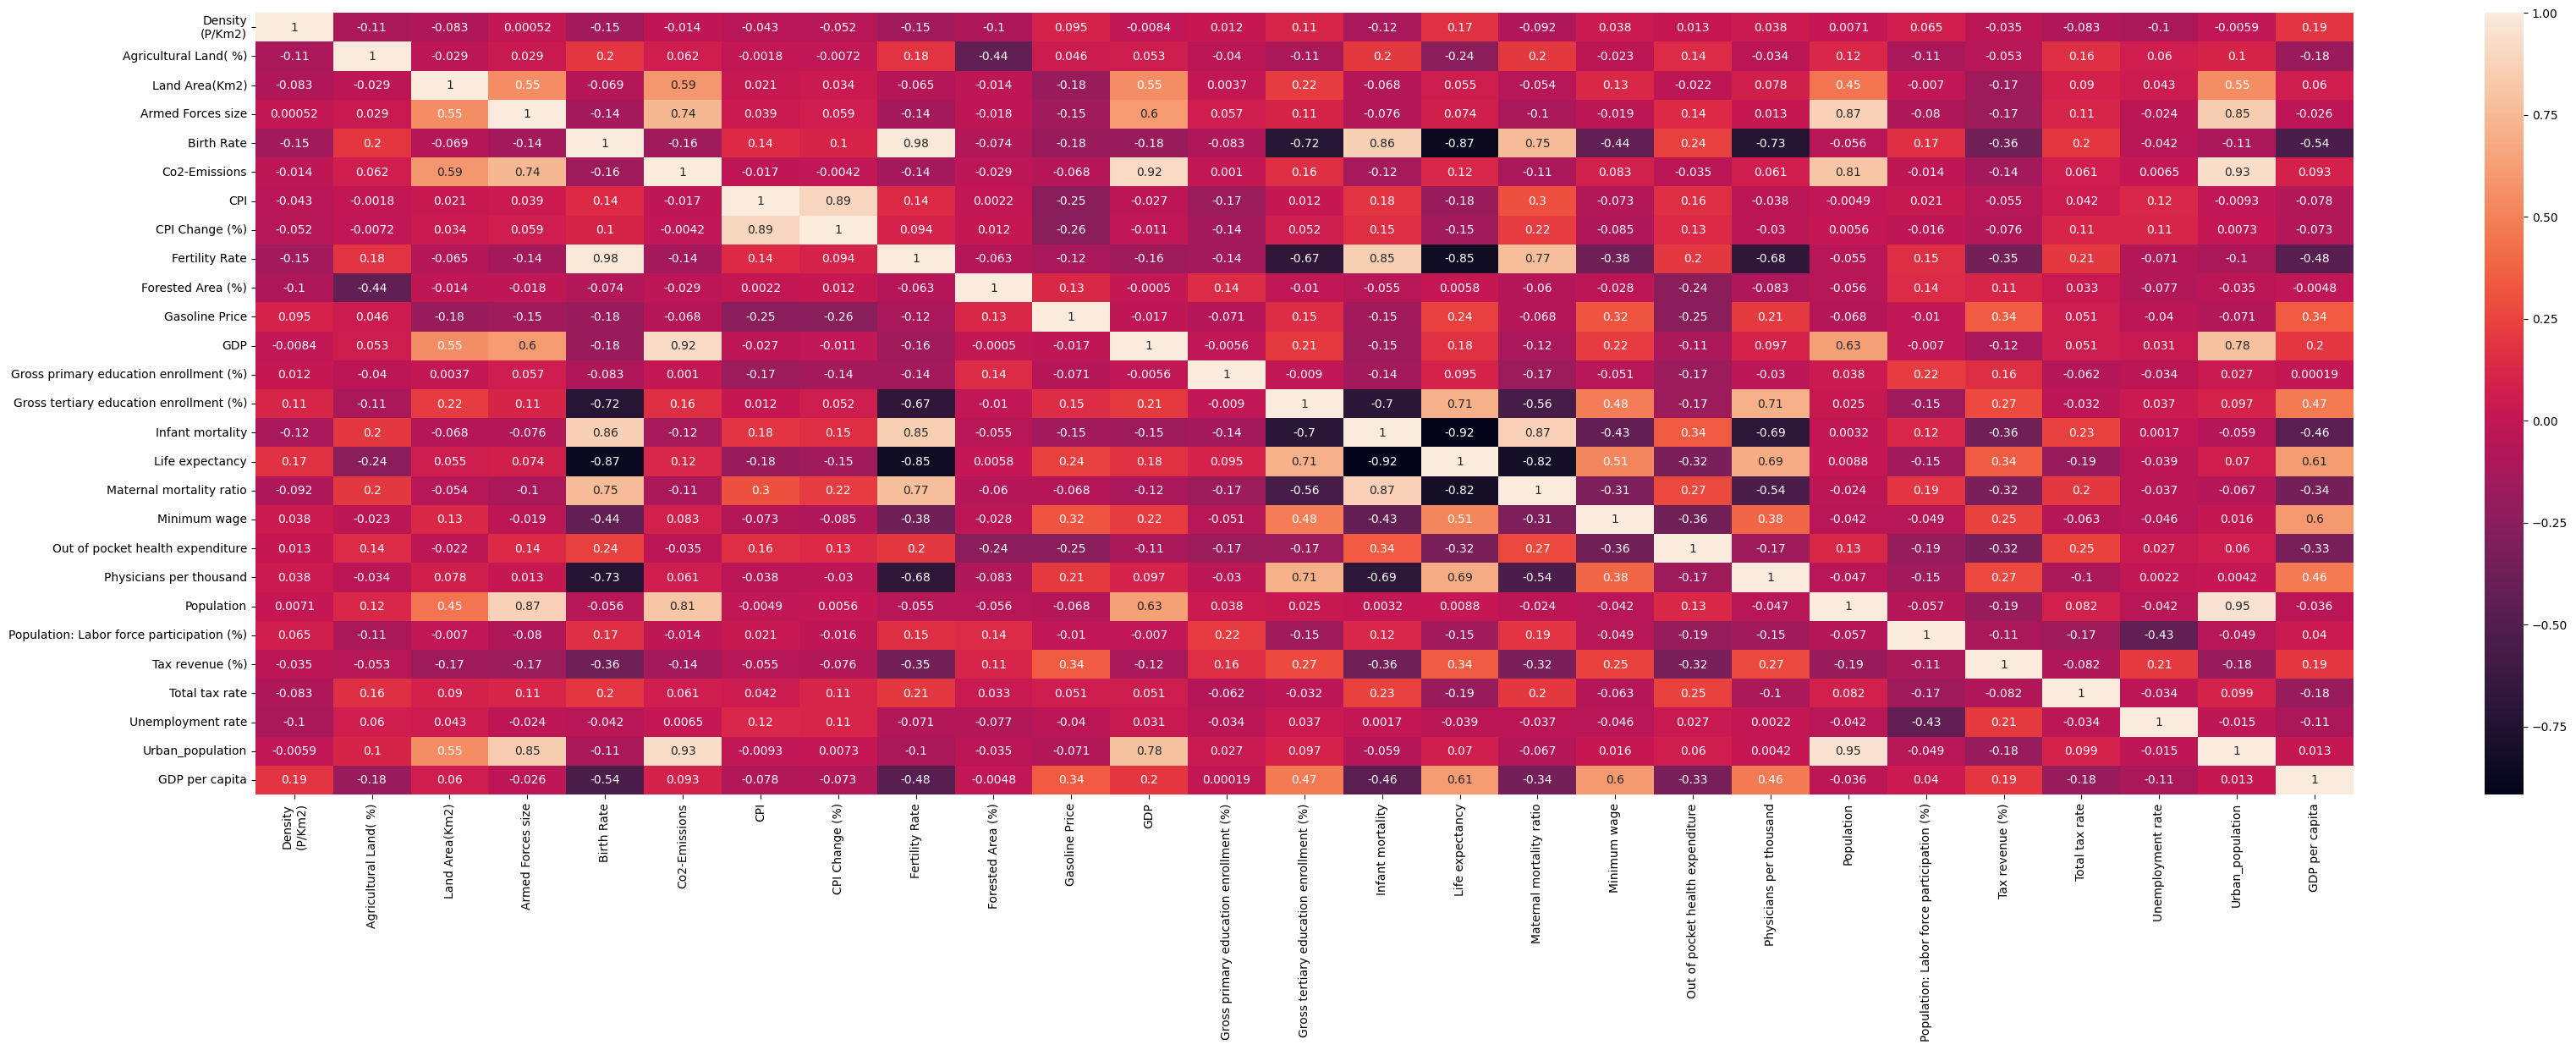

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
data2 = data1.iloc[:,1:]
# Calculate the correlation matrix
plt.figure(figsize=(40, 12))


# Generate a heatmap of the correlation matrix
sns.heatmap(data2.corr(), annot=True)
plt.show()


In [ ]:
# Get pairs of variables with correlation greater than 0.5
corr_matrix = data1.iloc[:,1:].corr()
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
  for j in range(i + 1, len(corr_matrix.columns)):
    if abs(corr_matrix.iloc[i, j]) > 0.5:
      high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

print("Pairs of variables with correlation greater than 0.5:")
for pair in high_corr_pairs:
  print(pair)


Pairs of variables with correlation greater than 0.5:
('Land Area(Km2)', 'Armed Forces size')
('Land Area(Km2)', 'Co2-Emissions')
('Land Area(Km2)', 'GDP')
('Land Area(Km2)', 'Urban_population')
('Armed Forces size', 'Co2-Emissions')
('Armed Forces size', 'GDP')
('Armed Forces size', 'Population')
('Armed Forces size', 'Urban_population')
('Birth Rate', 'Fertility Rate')
('Birth Rate', 'Gross tertiary education enrollment (%)')
('Birth Rate', 'Infant mortality')
('Birth Rate', 'Life expectancy')
('Birth Rate', 'Maternal mortality ratio')
('Birth Rate', 'Physicians per thousand')
('Birth Rate', 'GDP per capita')
('Co2-Emissions', 'GDP')
('Co2-Emissions', 'Population')
('Co2-Emissions', 'Urban_population')
('CPI', 'CPI Change (%)')
('Fertility Rate', 'Gross tertiary education enrollment (%)')
('Fertility Rate', 'Infant mortality')
('Fertility Rate', 'Life expectancy')
('Fertility Rate', 'Maternal mortality ratio')
('Fertility Rate', 'Physicians per thousand')
('GDP', 'Population')
('GDP'

## Population EDA

In [ ]:
data1.columns

Index(['Country', 'Density\n(P/Km2)', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions',
       'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'GDP per capita'],
      dtype='object')

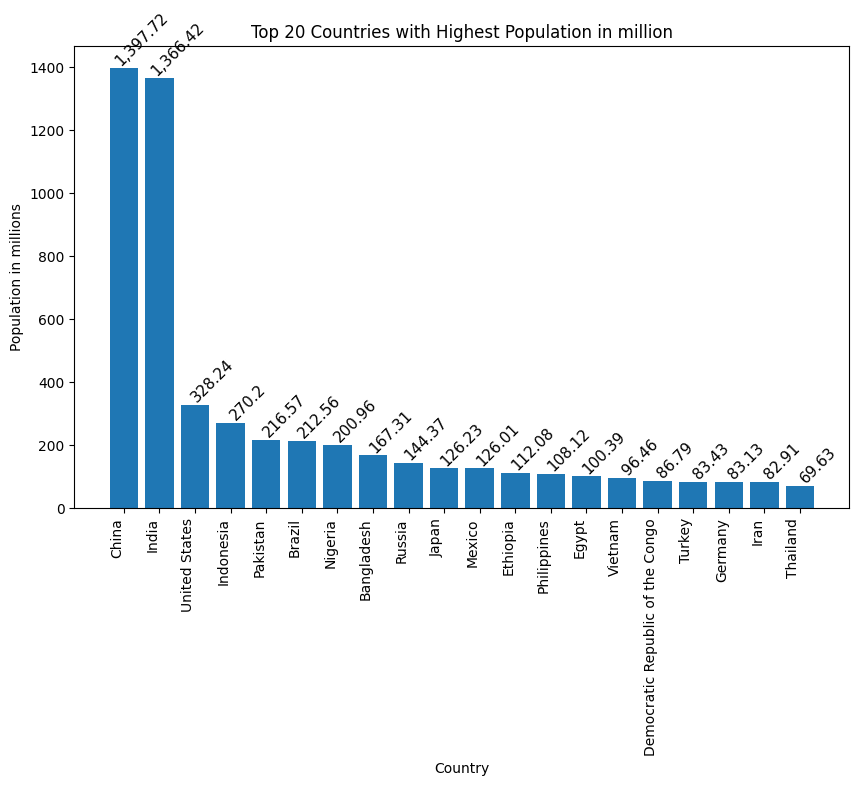

In [ ]:
# prompt: generate a top 20 countries with population density

top_20_density = data1.sort_values('Population', ascending=False).head(20)
bottom_20_density = data1.sort_values('Population', ascending=True).head(20)

top_20_density['Population'] = top_20_density['Population']/1000000
bottom_20_density['Population'] = bottom_20_density['Population']/1000000

# Display the top 20 countries with highest population density
plt.figure(figsize=(10, 6))

plot_bar = plt.bar(top_20_density['Country'], top_20_density['Population'])

for i, bar in enumerate(plot_bar):
    yval = bar.get_height()
    plt.text(bar.get_x()+.5 + bar.get_width() / 2, yval, "{:,}".format(round(yval, 2)), ha='center', va='bottom', fontsize=11, rotation=45)

plt.title('Top 20 Countries with Highest Population in million')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Country')
plt.ylabel('Population in millions')
plt.show()

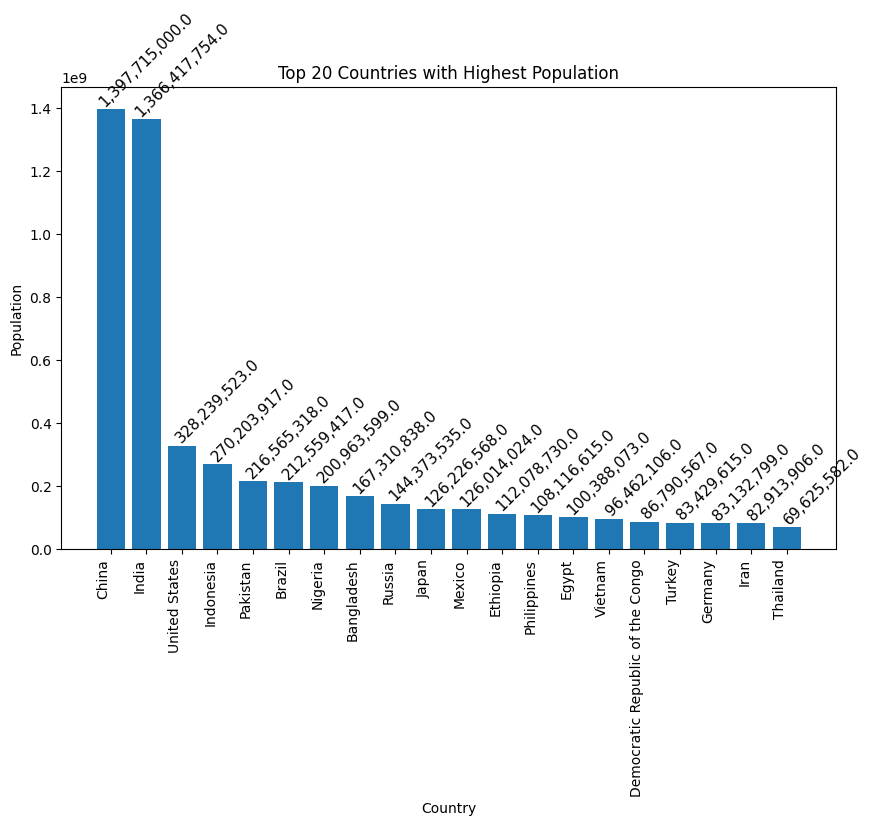

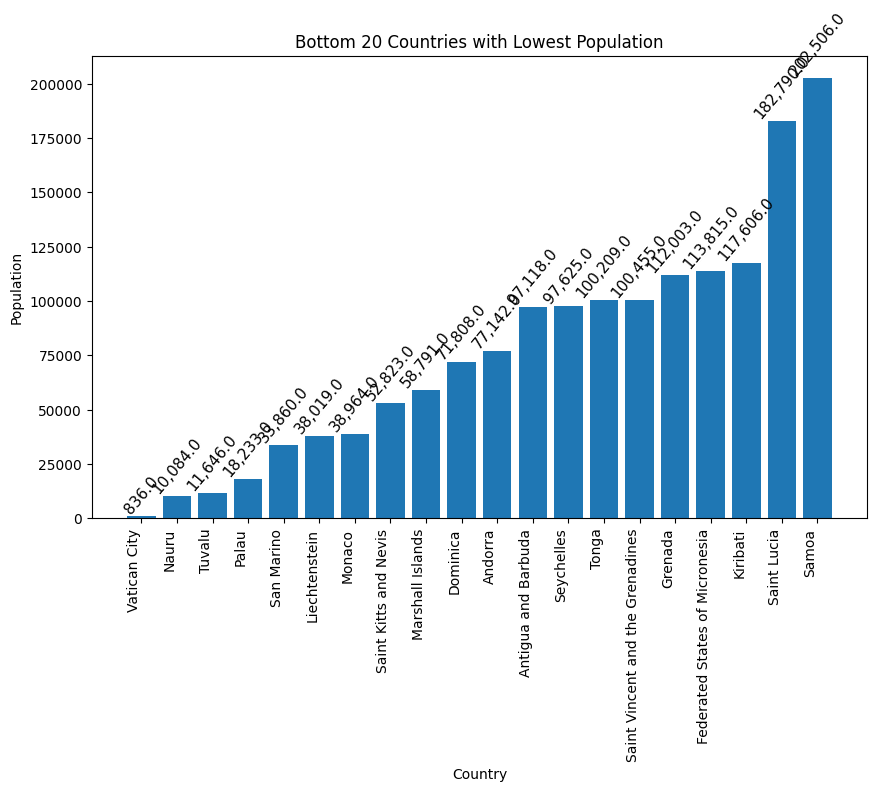

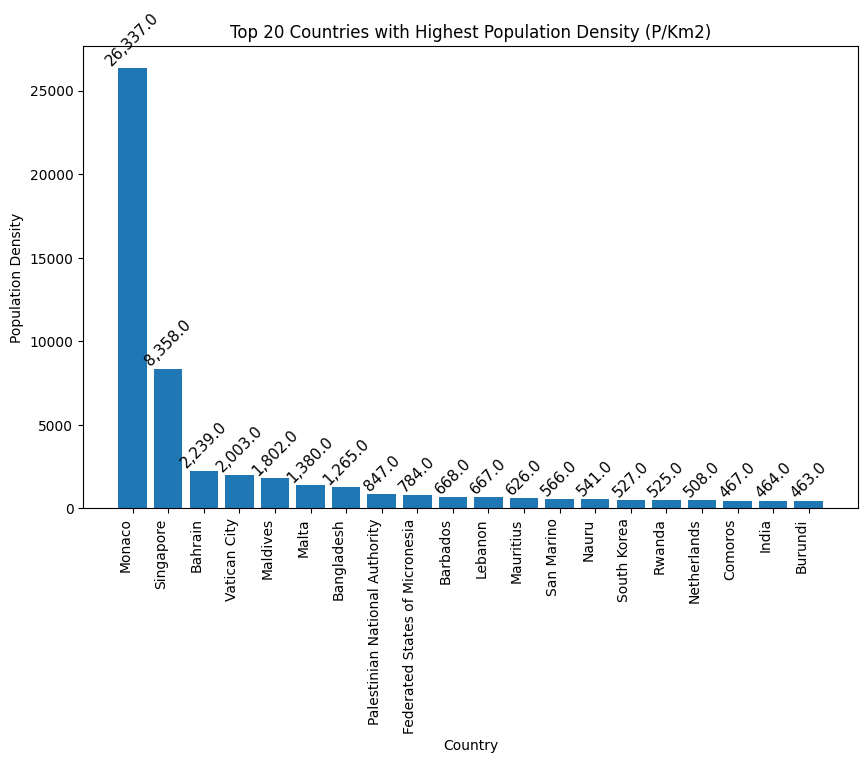

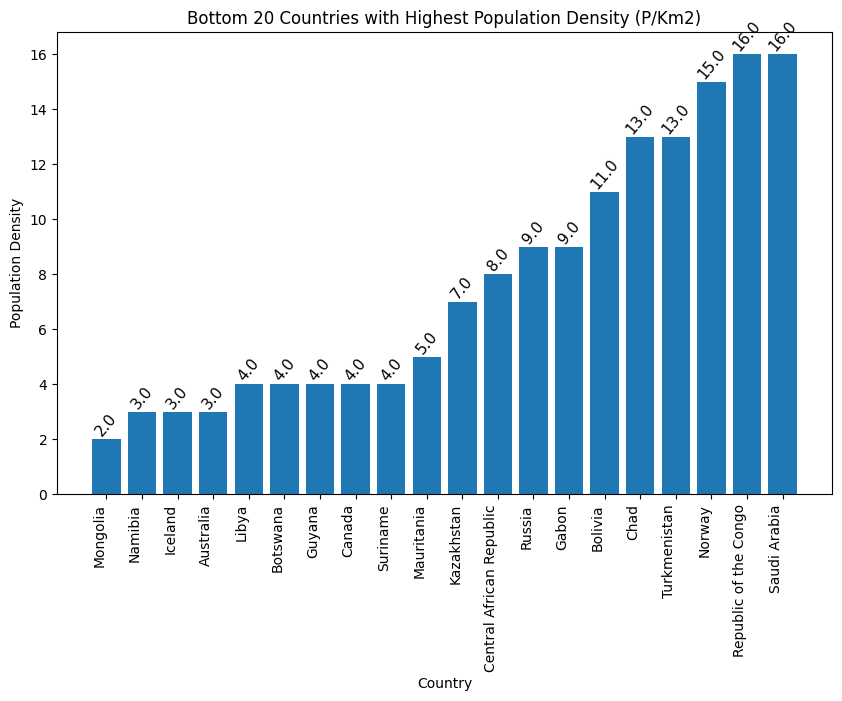

In [ ]:
# prompt: generate a top 20 countries with population density

top_20_density = data1.sort_values('Population', ascending=False).head(20)
bottom_20_density = data1.sort_values('Population', ascending=True).head(20)

top_20_density['Population'] = top_20_density['Population']/1000000
bottom_20_density['Population'] = bottom_20_density['Population']/1000000

# Display the top 20 countries with highest population density
plt.figure(figsize=(10, 6))

plot_bar = plt.bar(top_20_density['Country'], top_20_density['Population'])

for i, bar in enumerate(plot_bar):
    yval = bar.get_height()
    plt.text(bar.get_x()+1 + bar.get_width() / 2, yval, "{:,}".format(round(yval, 2)), ha='center', va='bottom', fontsize=11, rotation=45)

plt.title('Top 20 Countries with Highest Population in million')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Country')
plt.ylabel('Population in millions')
plt.show()
print('')

plt.figure(figsize=(10, 6))
plot_bar = plt.bar(bottom_20_density['Country'], bottom_20_density['Population'])

for i, bar in enumerate(plot_bar):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, "{:,}".format(round(yval, 2)), ha='center', va='bottom', fontsize=11, rotation=50)

plt.title('Bottom 20 Countries with Lowest Population')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Country')
plt.ylabel('Population')
plt.show()

print('')
# --------------------------------------------------------------------------------------------------------------------------------
# Sort the DataFrame by 'Density (P/Km2)' in descending order and select the top 20
top_20_density = data1.sort_values('Density\n(P/Km2)', ascending=False).head(20)
bottom_20_density = data1.sort_values('Density\n(P/Km2)', ascending=True).head(20)

# Display the top 20 countries with highest population density
plt.figure(figsize=(10, 6))
plot_bar = plt.bar(top_20_density['Country'], top_20_density['Density\n(P/Km2)'])

for i, bar in enumerate(plot_bar):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, "{:,}".format(round(yval, 2)), ha='center', va='bottom', fontsize=11, rotation=45)

plt.title('Top 20 Countries with Highest Population Density (P/Km2)')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Country')
plt.ylabel('Population Density')
plt.show()
# --------------------------------------------------------------------------------------------------------------------------------
print('')
plt.figure(figsize=(10, 6))
plot_bar = plt.bar(bottom_20_density['Country'], bottom_20_density['Density\n(P/Km2)'])

for i, bar in enumerate(plot_bar):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, "{:,}".format(round(yval, 2)), ha='center', va='bottom', fontsize=11, rotation=50)

plt.title('Bottom 20 Countries with Highest Population Density (P/Km2)')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Country')
plt.ylabel('Population Density')
plt.show()



In [ ]:
data1.columns

Index(['Country', 'Density\n(P/Km2)', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions',
       'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'GDP per capita'],
      dtype='object')

## Economic EDA

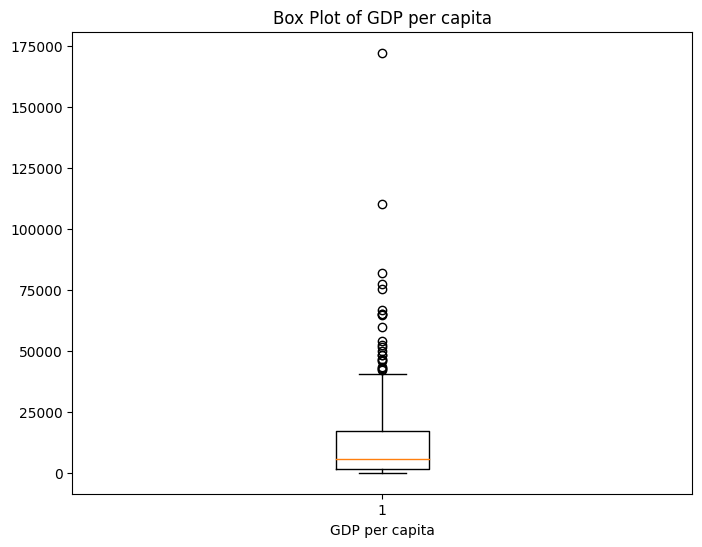

count 188.00
mean 14987.56
std 22377.72
min 261.25
25% 1887.26
50% 5978.25
75% 17498.87
max 172357.47


In [ ]:
# prompt: create a column with 'GDP per capita' where this is given by Gdp / population and give the box plot this diagram

# Creating a new column for GDP per capita
import matplotlib.pyplot as plt
import seaborn as sns
data1['GDP per capita'] = data1['GDP'] / data1['Population']

# Creating a box plot for GDP per capita
plt.figure(figsize=(8, 6))
plt.boxplot(x=data1['GDP per capita'])
plt.title('Box Plot of GDP per capita')
plt.xlabel('GDP per capita')
plt.show()
for index, val in data1['GDP per capita'].describe().items():
  print(index,'{:.2f}'.format(val))

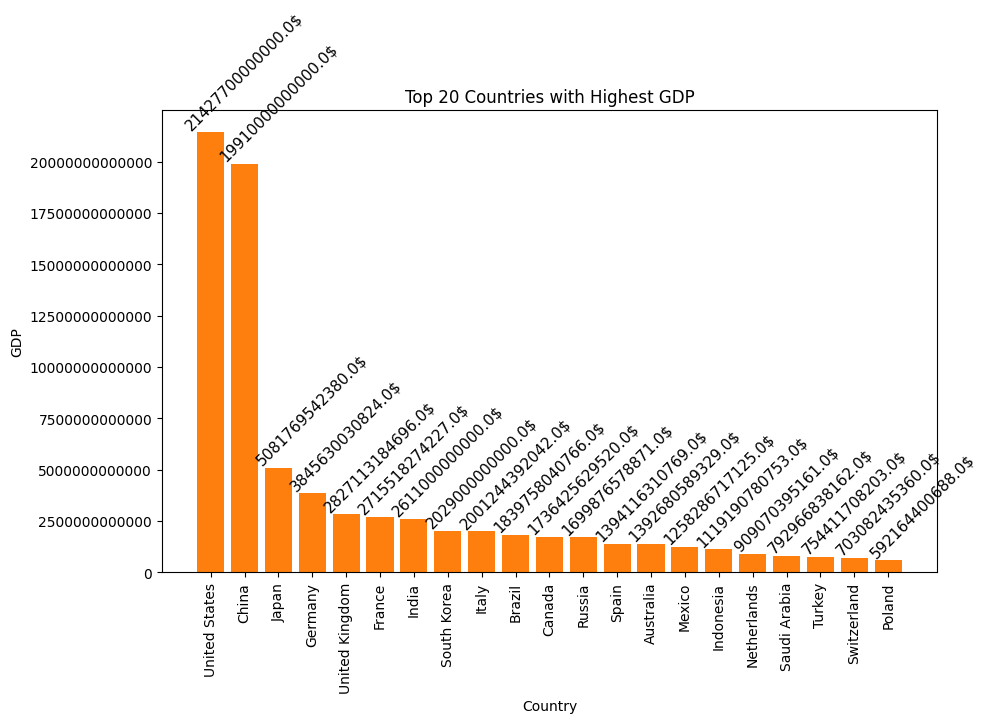

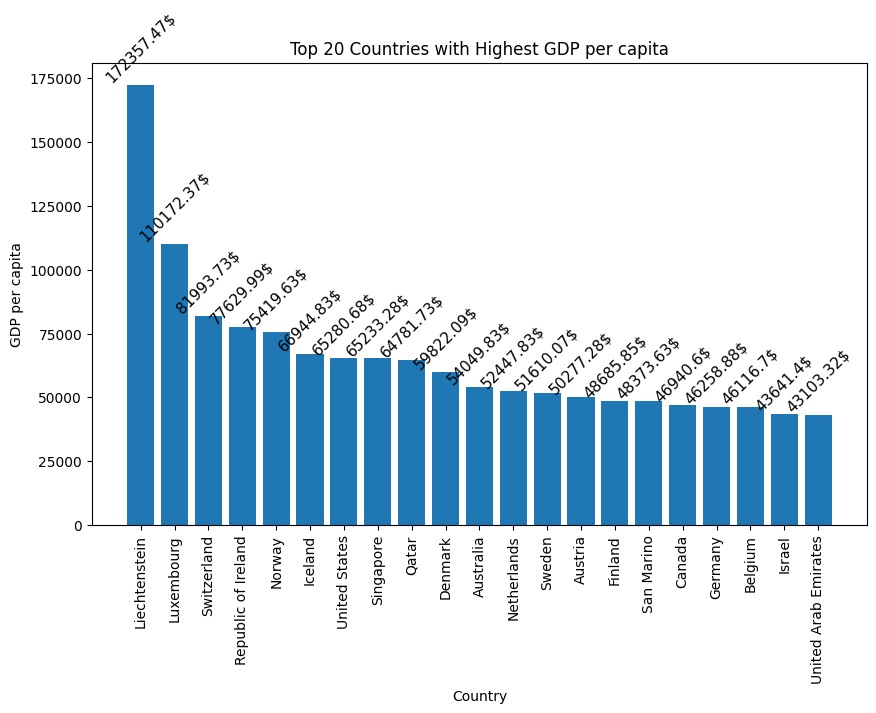

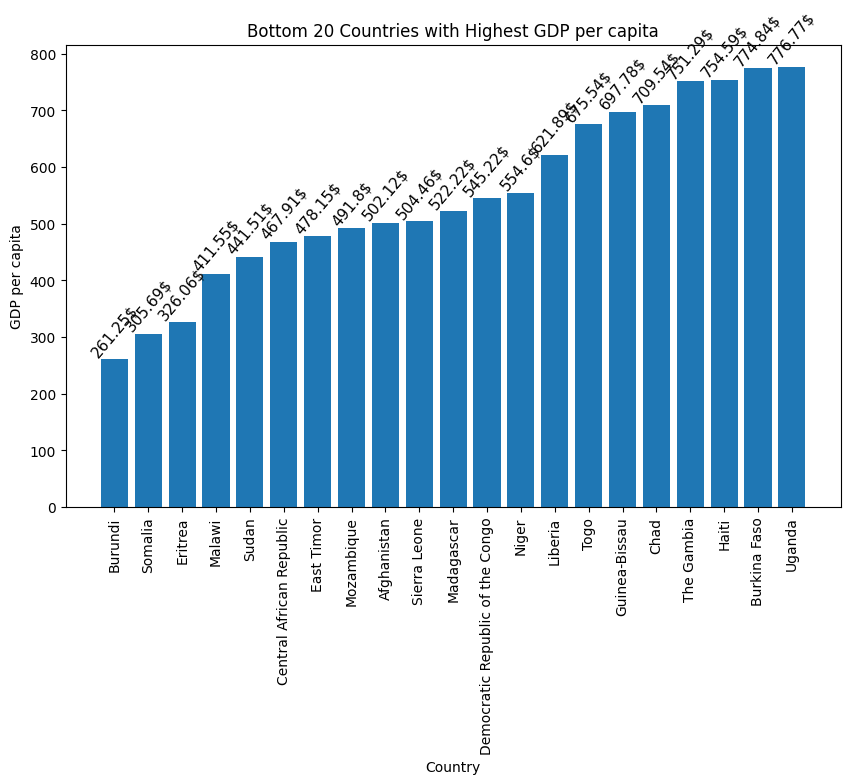

In [ ]:
sorted=data1.sort_values(by='GDP', ascending=False)[0:21]
plt.figure(figsize=(10, 6))
plt.bar(sorted['Country'], sorted['GDP'])

plt.ticklabel_format(style='plain', axis='y')
for i, bar in enumerate(plt.bar(sorted['Country'], sorted['GDP'])):
    yval = bar.get_height()
    plt.text(bar.get_x()+1 + bar.get_width() / 2, yval, '{}$'.format(round(yval, 2)), ha='center', va='bottom',fontsize=11,rotation=45)

plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('Top 20 Countries with Highest GDP')
plt.xticks(rotation=90)
plt.show()

print('')
# plotting the bar diagram for countries with 20 top  GDP per capita.
sorted=data1.sort_values(by='GDP per capita', ascending=False)[0:21]
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted['Country'], sorted['GDP per capita'])

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval,'{}$'.format( round(yval, 2)), ha='center', va='bottom', fontsize=11, rotation=45)

plt.ticklabel_format(style='plain', axis='y')


plt.xlabel('Country')
plt.ylabel('GDP per capita')
plt.title('Top 20 Countries with Highest GDP per capita')
plt.xticks(rotation=90)
plt.show()
print('')

# plotting the bar diagram for countries with 20 lowest  GDP per capita.
sorted=data1.sort_values(by='GDP per capita', ascending=True)[0:21]
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted['Country'], sorted['GDP per capita'])

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval,'{}$'.format( round(yval, 2)), ha='center', va='bottom', fontsize=11, rotation=50)

plt.ticklabel_format(style='plain', axis='y')


plt.xlabel('Country')
plt.ylabel('GDP per capita')
plt.title('Bottom 20 Countries with Highest GDP per capita')
plt.xticks(rotation=90)
plt.show()

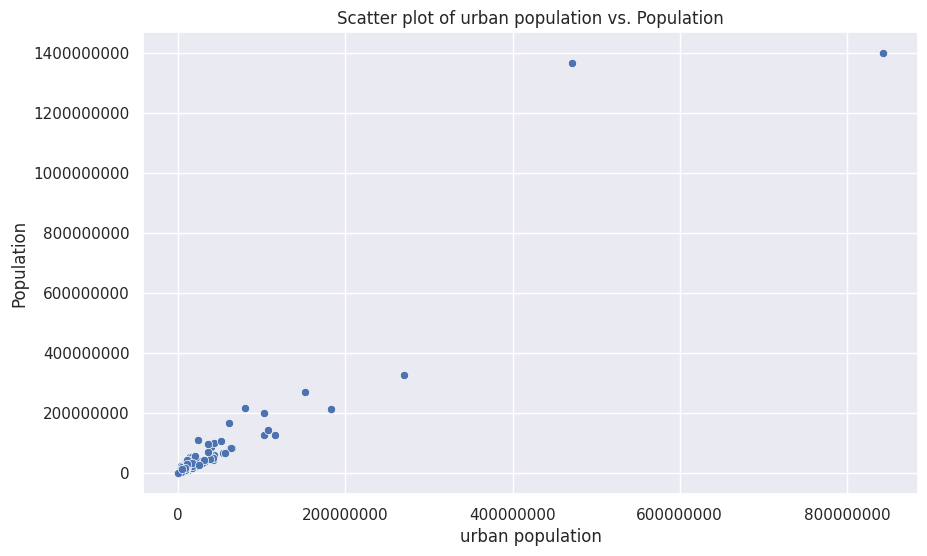

In [ ]:
# prompt: generate scatter plot for the gdp per capita with population growth

# Create a scatter plot for GDP per capita vs. Population growth

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Urban_population', y='Population', data=data1)
plt.title('Scatter plot of urban population vs. Population')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('urban population')
plt.ylabel('Population')
plt.show()


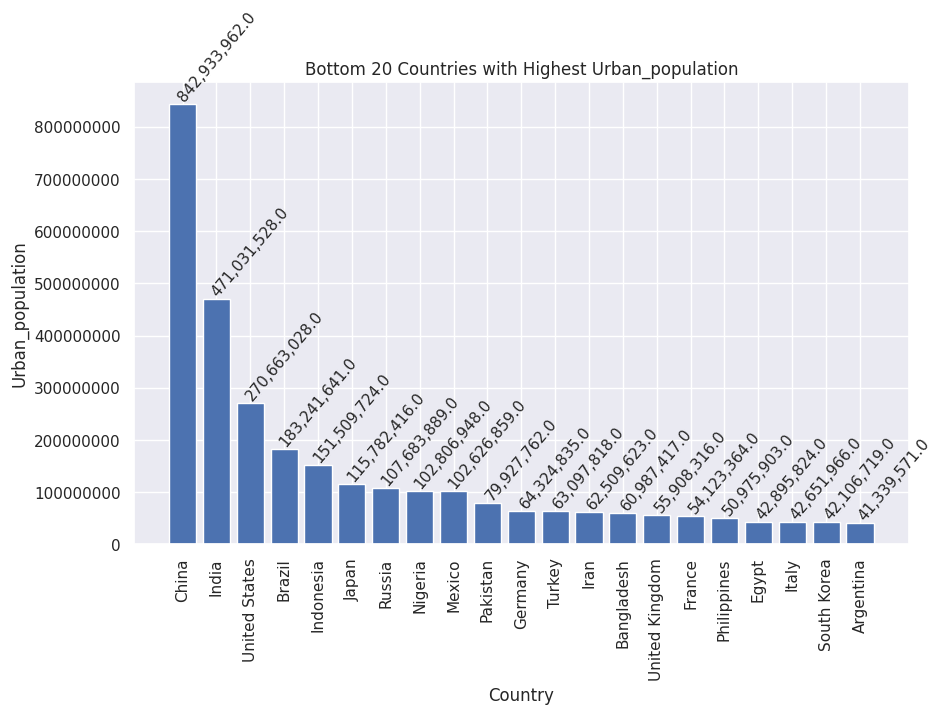

In [ ]:
sorted=data1.sort_values(by='Urban_population', ascending=False)[0:21]
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted['Country'], sorted['Urban_population'])

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x()+1 + bar.get_width() / 2, yval,'{:,}'.format( round(yval, 2)), ha='center', va='bottom', fontsize=11, rotation=50)

plt.ticklabel_format(style='plain', axis='y')


plt.xlabel('Country')
plt.ylabel('Urban_population')
plt.title('top 20 Countries with Highest Urban_population')
plt.xticks(rotation=90)
plt.show()

## Health EDA

In [ ]:
data1.columns

Index(['Country', 'Density\n(P/Km2)', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions',
       'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'GDP per capita'],
      dtype='object')

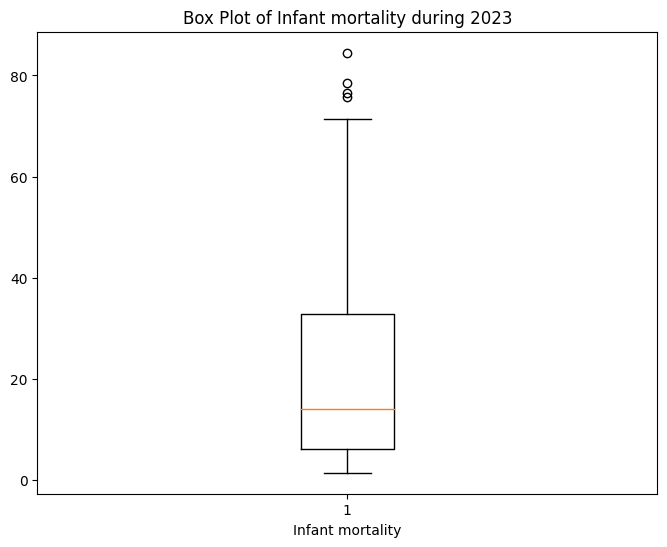

count 188.00
mean 21.44
std 19.55
min 1.40
25% 6.07
50% 14.00
75% 32.75
max 84.50


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a box plot for GDP per capita
plt.figure(figsize=(8, 6))
plt.boxplot(x=data1['Infant mortality'])
plt.title('Box Plot of Infant mortality during 2023')
plt.xlabel('Infant mortality')
plt.show()
for index, val in data1['Infant mortality'].describe().items():
  print(index,'{:.2f}'.format(val))

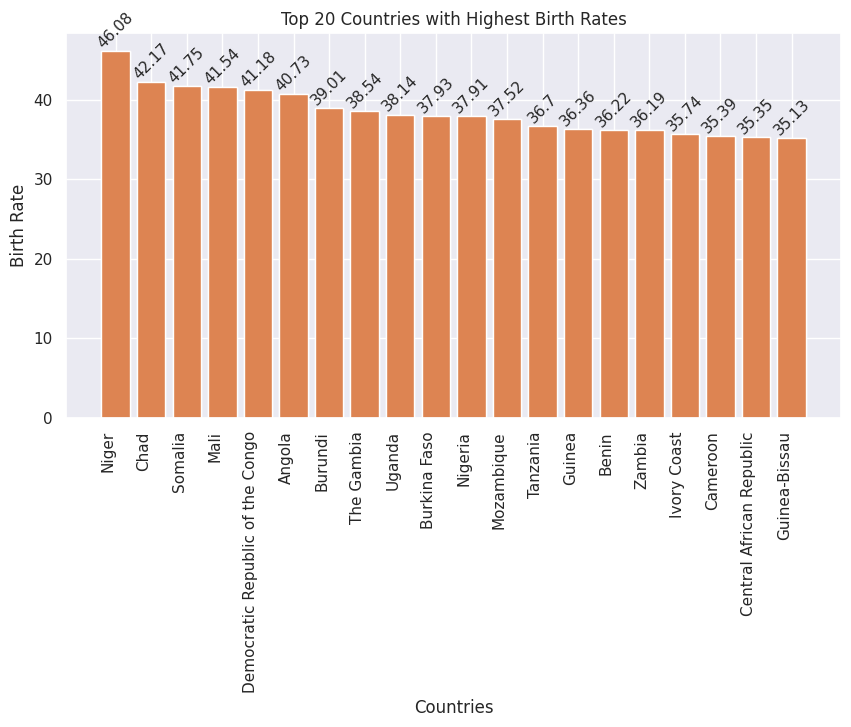

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})

# Get the top 20 countries with the highest birth rates
top_20_countries = data1.sort_values(by='Birth Rate', ascending=False).head(20)
bottom_20 = data1.sort_values(by='Birth Rate', ascending=True).head(20)

# Create a bar chart
plt.bar(top_20_countries['Country'], top_20_countries['Birth Rate'])

# Add labels to the bars
for i, bar in enumerate(plt.bar(top_20_countries['Country'], top_20_countries['Birth Rate'])):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom',fontsize=11,rotation=45)

# Add a title and axis labels
plt.title('Top 20 Countries with Highest Birth Rates')
plt.xticks(rotation=90,ha='right')
plt.xlabel('Countries')
plt.ylabel('Birth Rate')

# Show the plot
plt.show()


countries Niger, Chand, Somalia, Mali. are having higher birth rates with 46.08

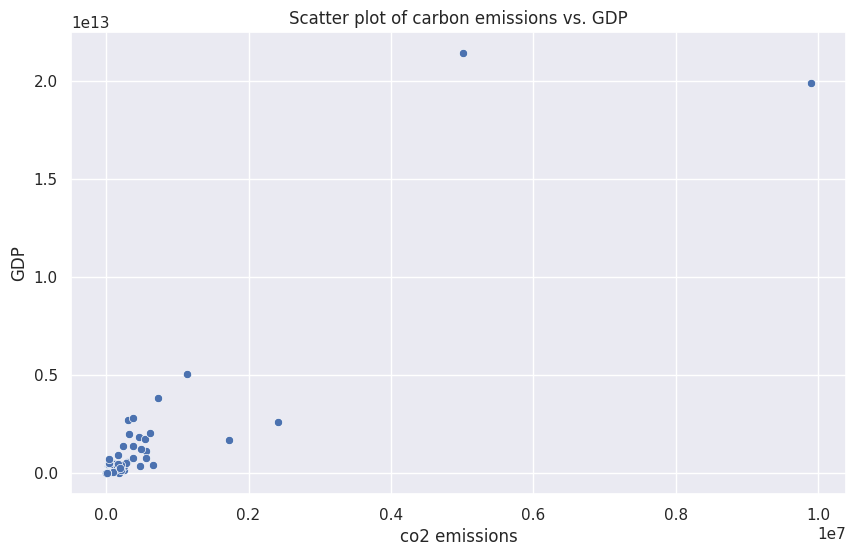

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Co2-Emissions', y='GDP', data=data1)
plt.title('Scatter plot of carbon emissions vs. GDP')
plt.xlabel('co2 emissions')
plt.ylabel('GDP')
plt.show()

## Education EDA

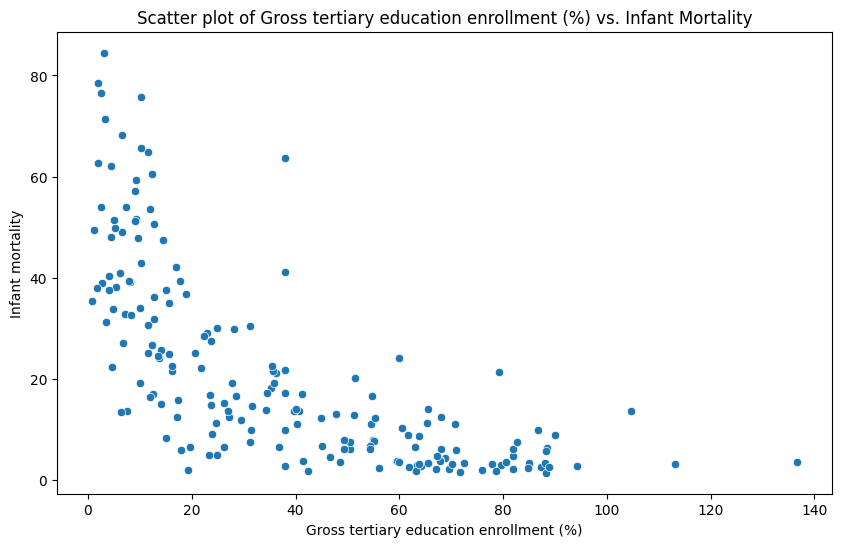

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gross tertiary education enrollment (%)', y='Infant mortality', data=data1)
plt.title('Scatter plot of Gross tertiary education enrollment (%) vs. Infant Mortality')
# plt.ylabel('Infant Mortality')
plt.show()

## Environment and Environmental EDA

In [ ]:
data1.columns

Index(['Country', 'Density\n(P/Km2)', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions',
       'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'GDP per capita'],
      dtype='object')

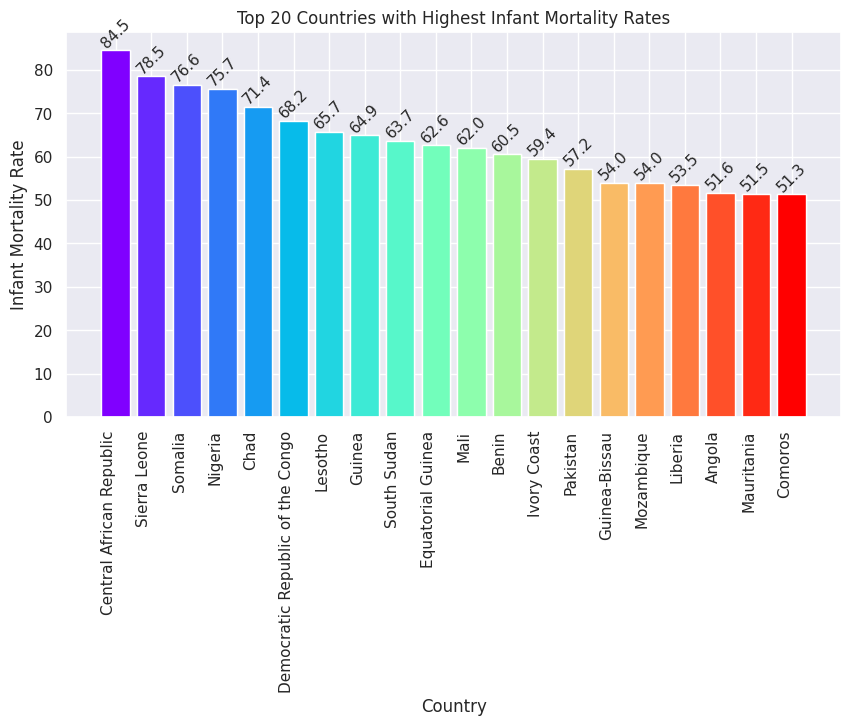

In [ ]:

# Get the top 20 countries with the highest infant mortality rates
top_20_infant_mortality = data1.sort_values(by='Infant mortality', ascending=False).head(20)

# Create a bar chart with rainbow colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(top_20_infant_mortality)))
plt.bar(top_20_infant_mortality['Country'], top_20_infant_mortality['Infant mortality'], color=colors)

# Add labels to the bars
for i, bar in enumerate(plt.bar(top_20_infant_mortality['Country'], top_20_infant_mortality['Infant mortality'], color=colors)):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=11, rotation=45)

# Add a title and axis labels
plt.title('Top 20 Countries with Highest Infant Mortality Rates')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Country')
plt.ylabel('Infant Mortality Rate')

# Show the plot
plt.show()


In [ ]:
# prompt: describe the infanct mortality column

data1['Infant mortality'].describe().round(2)


count    195.00
mean      21.33
std       19.24
min        1.40
25%        6.10
50%       14.80
75%       31.55
max       84.50
Name: Infant mortality, dtype: float64

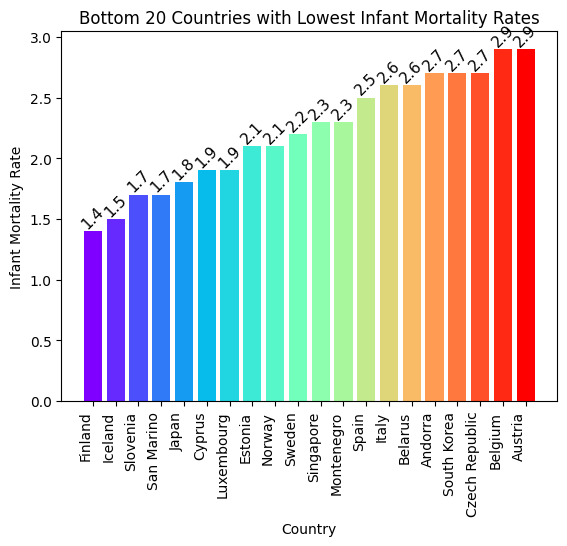

In [ ]:
top_20_infant_mortality = data1.sort_values(by='Infant mortality', ascending=True).head(20)

# Create a bar chart with rainbow colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(top_20_infant_mortality)))
plt.bar(top_20_infant_mortality['Country'], top_20_infant_mortality['Infant mortality'], color=colors)

# Add labels to the bars
for i, bar in enumerate(plt.bar(top_20_infant_mortality['Country'], top_20_infant_mortality['Infant mortality'], color=colors)):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=11, rotation=45)

# Add a title and axis labels
plt.title('Bottom 20 Countries with Lowest Infant Mortality Rates')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Country')
plt.ylabel('Infant Mortality Rate')

# Show the plot
plt.show()


<ipython-input-10-b5bc0c45b8ce>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(top_20['Country'], rotation=90, ha='right')
<ipython-input-10-b5bc0c45b8ce>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(bottom_20['Country'], rotation=90, ha='right')


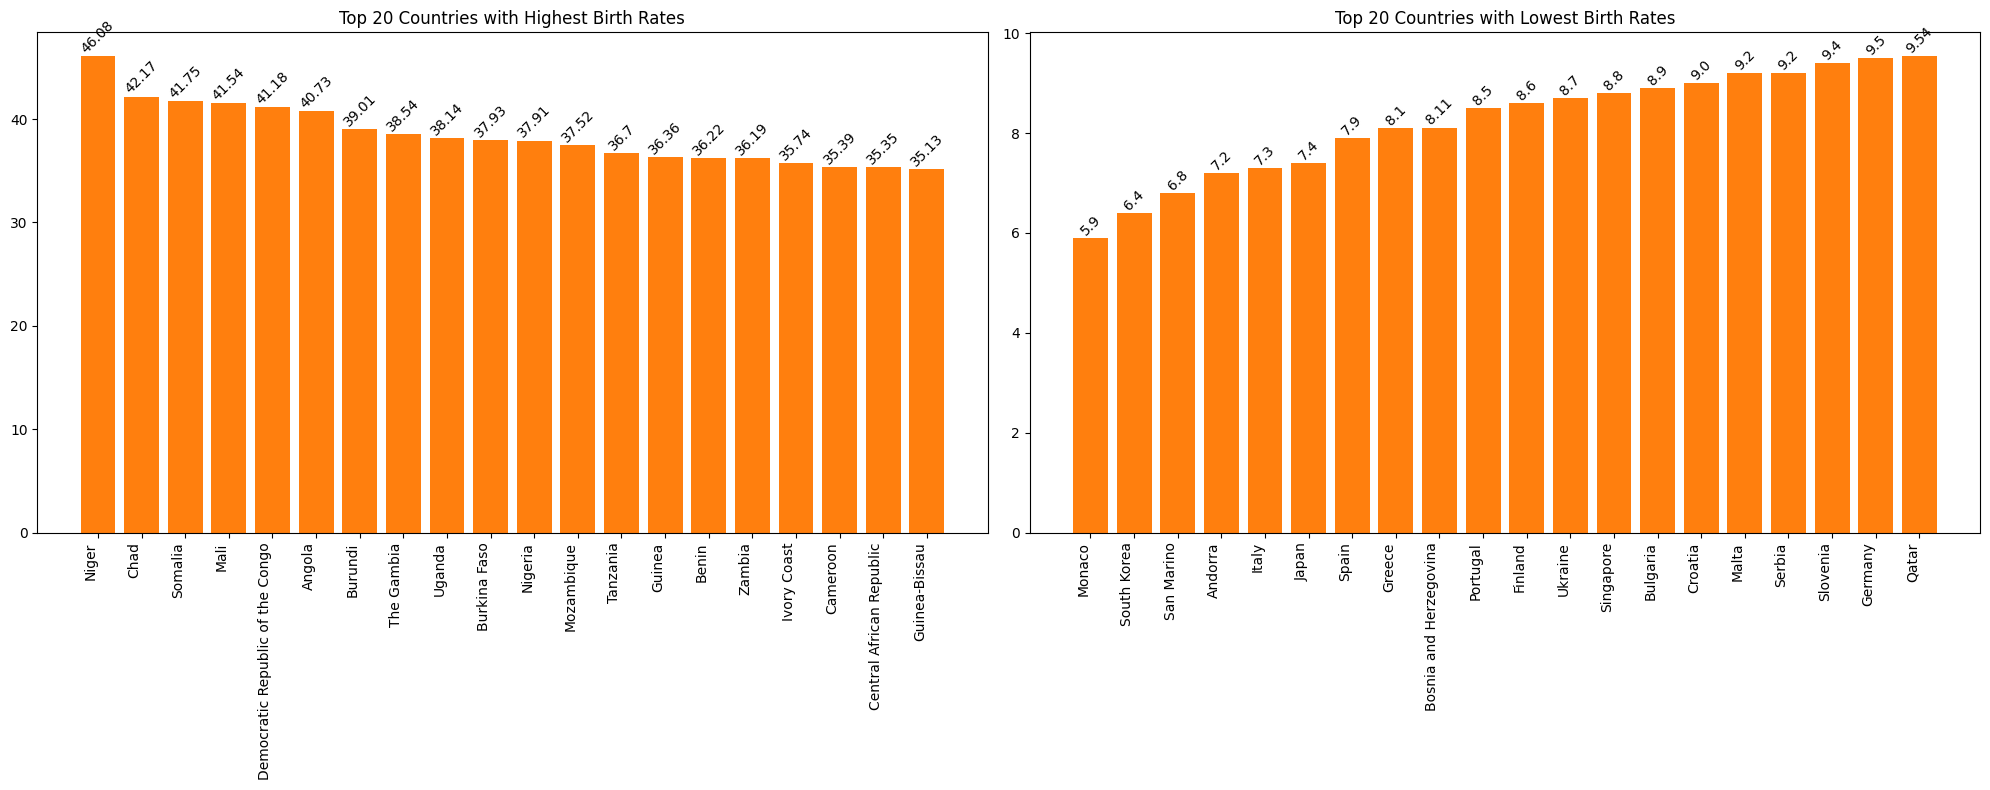

In [ ]:
# Sort by 'Birth Rate' and get top and bottom 20
top_20 = data1.sort_values(by='Birth Rate', ascending=False).head(20)
bottom_20 = data1.sort_values(by='Birth Rate', ascending=True).head(20)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot top 20
axes[0].bar(top_20['Country'], top_20['Birth Rate'])
axes[0].set_title('Top 20 Countries with Highest Birth Rates')
axes[0].set_xticklabels(top_20['Country'], rotation=90, ha='right')

# Plot bottom 20
axes[1].bar(bottom_20['Country'], bottom_20['Birth Rate'])
axes[1].set_title('Top 20 Countries with Lowest Birth Rates')
axes[1].set_xticklabels(bottom_20['Country'], rotation=90, ha='right')
for i, bar in enumerate(axes[0].bar(top_20['Country'], top_20['Birth Rate'])):
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10, rotation=45)

# Add data labels for bottom 20
for i, bar in enumerate(axes[1].bar(bottom_20['Country'], bottom_20['Birth Rate'])):
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10, rotation=45)


# Adjust layout and show plot
plt.tight_layout()
plt.show()

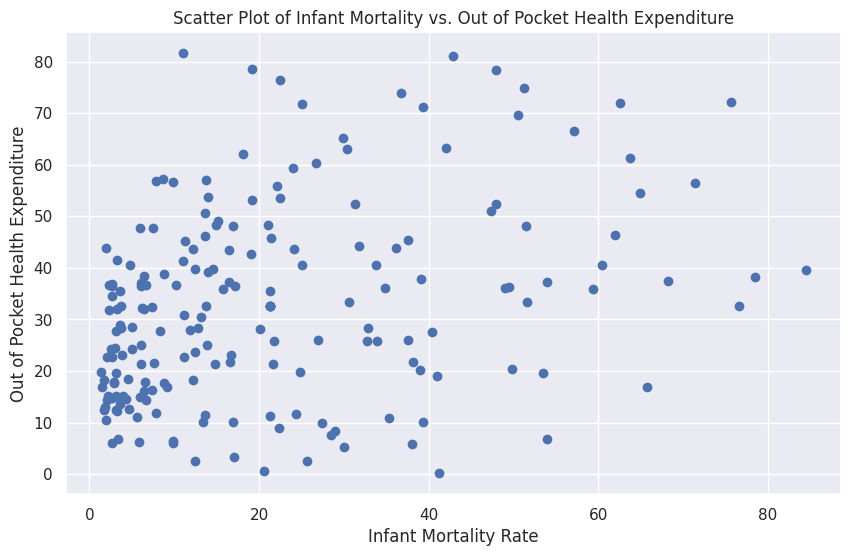

In [ ]:
# prompt: generate a scatter plot between the infanct mortality and Out of pocket health expenditure

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data1['Infant mortality'], data1['Out of pocket health expenditure'])
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Out of Pocket Health Expenditure')
plt.title('Scatter Plot of Infant Mortality vs. Out of Pocket Health Expenditure')
plt.show()


there is more scatterness between Infant Mortality Rate and Out-of-Pocket Health Experiment.This indicates countries having less infant Mortality rate have to spend less out of pocket health expenditure which means those countries have better health facilities.

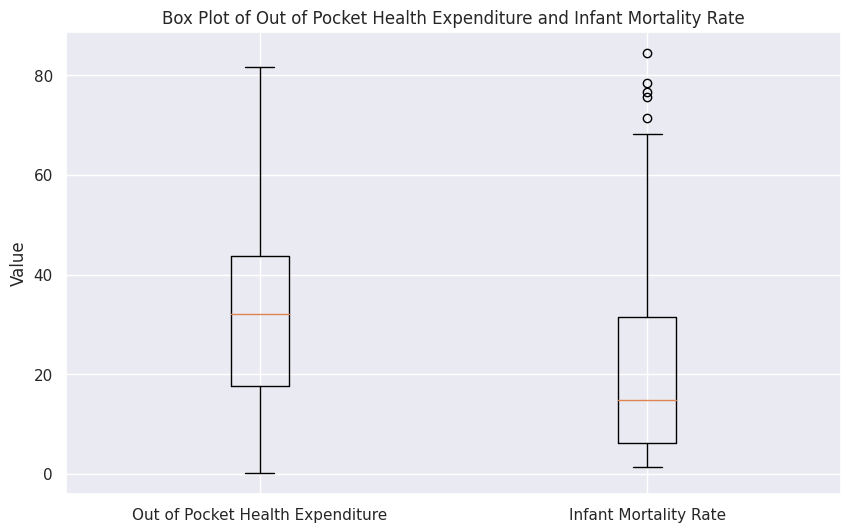

count    195.00
mean      32.64
std       18.82
min        0.20
25%       17.70
50%       32.10
75%       43.75
max       81.60
Name: Out of pocket health expenditure, dtype: float64
count    195.00
mean      21.33
std       19.24
min        1.40
25%        6.10
50%       14.80
75%       31.55
max       84.50
Name: Infant mortality, dtype: float64


In [ ]:
# prompt: generate a box plot for the Out of Pocket Health Expenditure, Infant Mortality Rate columns with labels on the graph

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([data1['Out of pocket health expenditure'], data1['Infant mortality']], labels=['Out of Pocket Health Expenditure', 'Infant Mortality Rate'])
plt.ylabel('Value')
plt.title('Box Plot of Out of Pocket Health Expenditure and Infant Mortality Rate')
plt.show()
print(data1['Out of pocket health expenditure'].describe().round(2))
print(data1['Infant mortality'].describe().round(2))

Countries exhibit significant variability in health expenditure practices, with out-of-pocket expenses averaging 32.64% and ranging from nearly negligible (0.20%) to extremely high (81.60%). Similarly, infant mortality rates also vary widely, averaging 21.33 deaths per 1,000 live births, with a range from 1.40 to 84.50. High out-of-pocket health expenses are often associated with higher infant mortality rates, suggesting that inadequate financial protection in health care can adversely impact child survival rates.

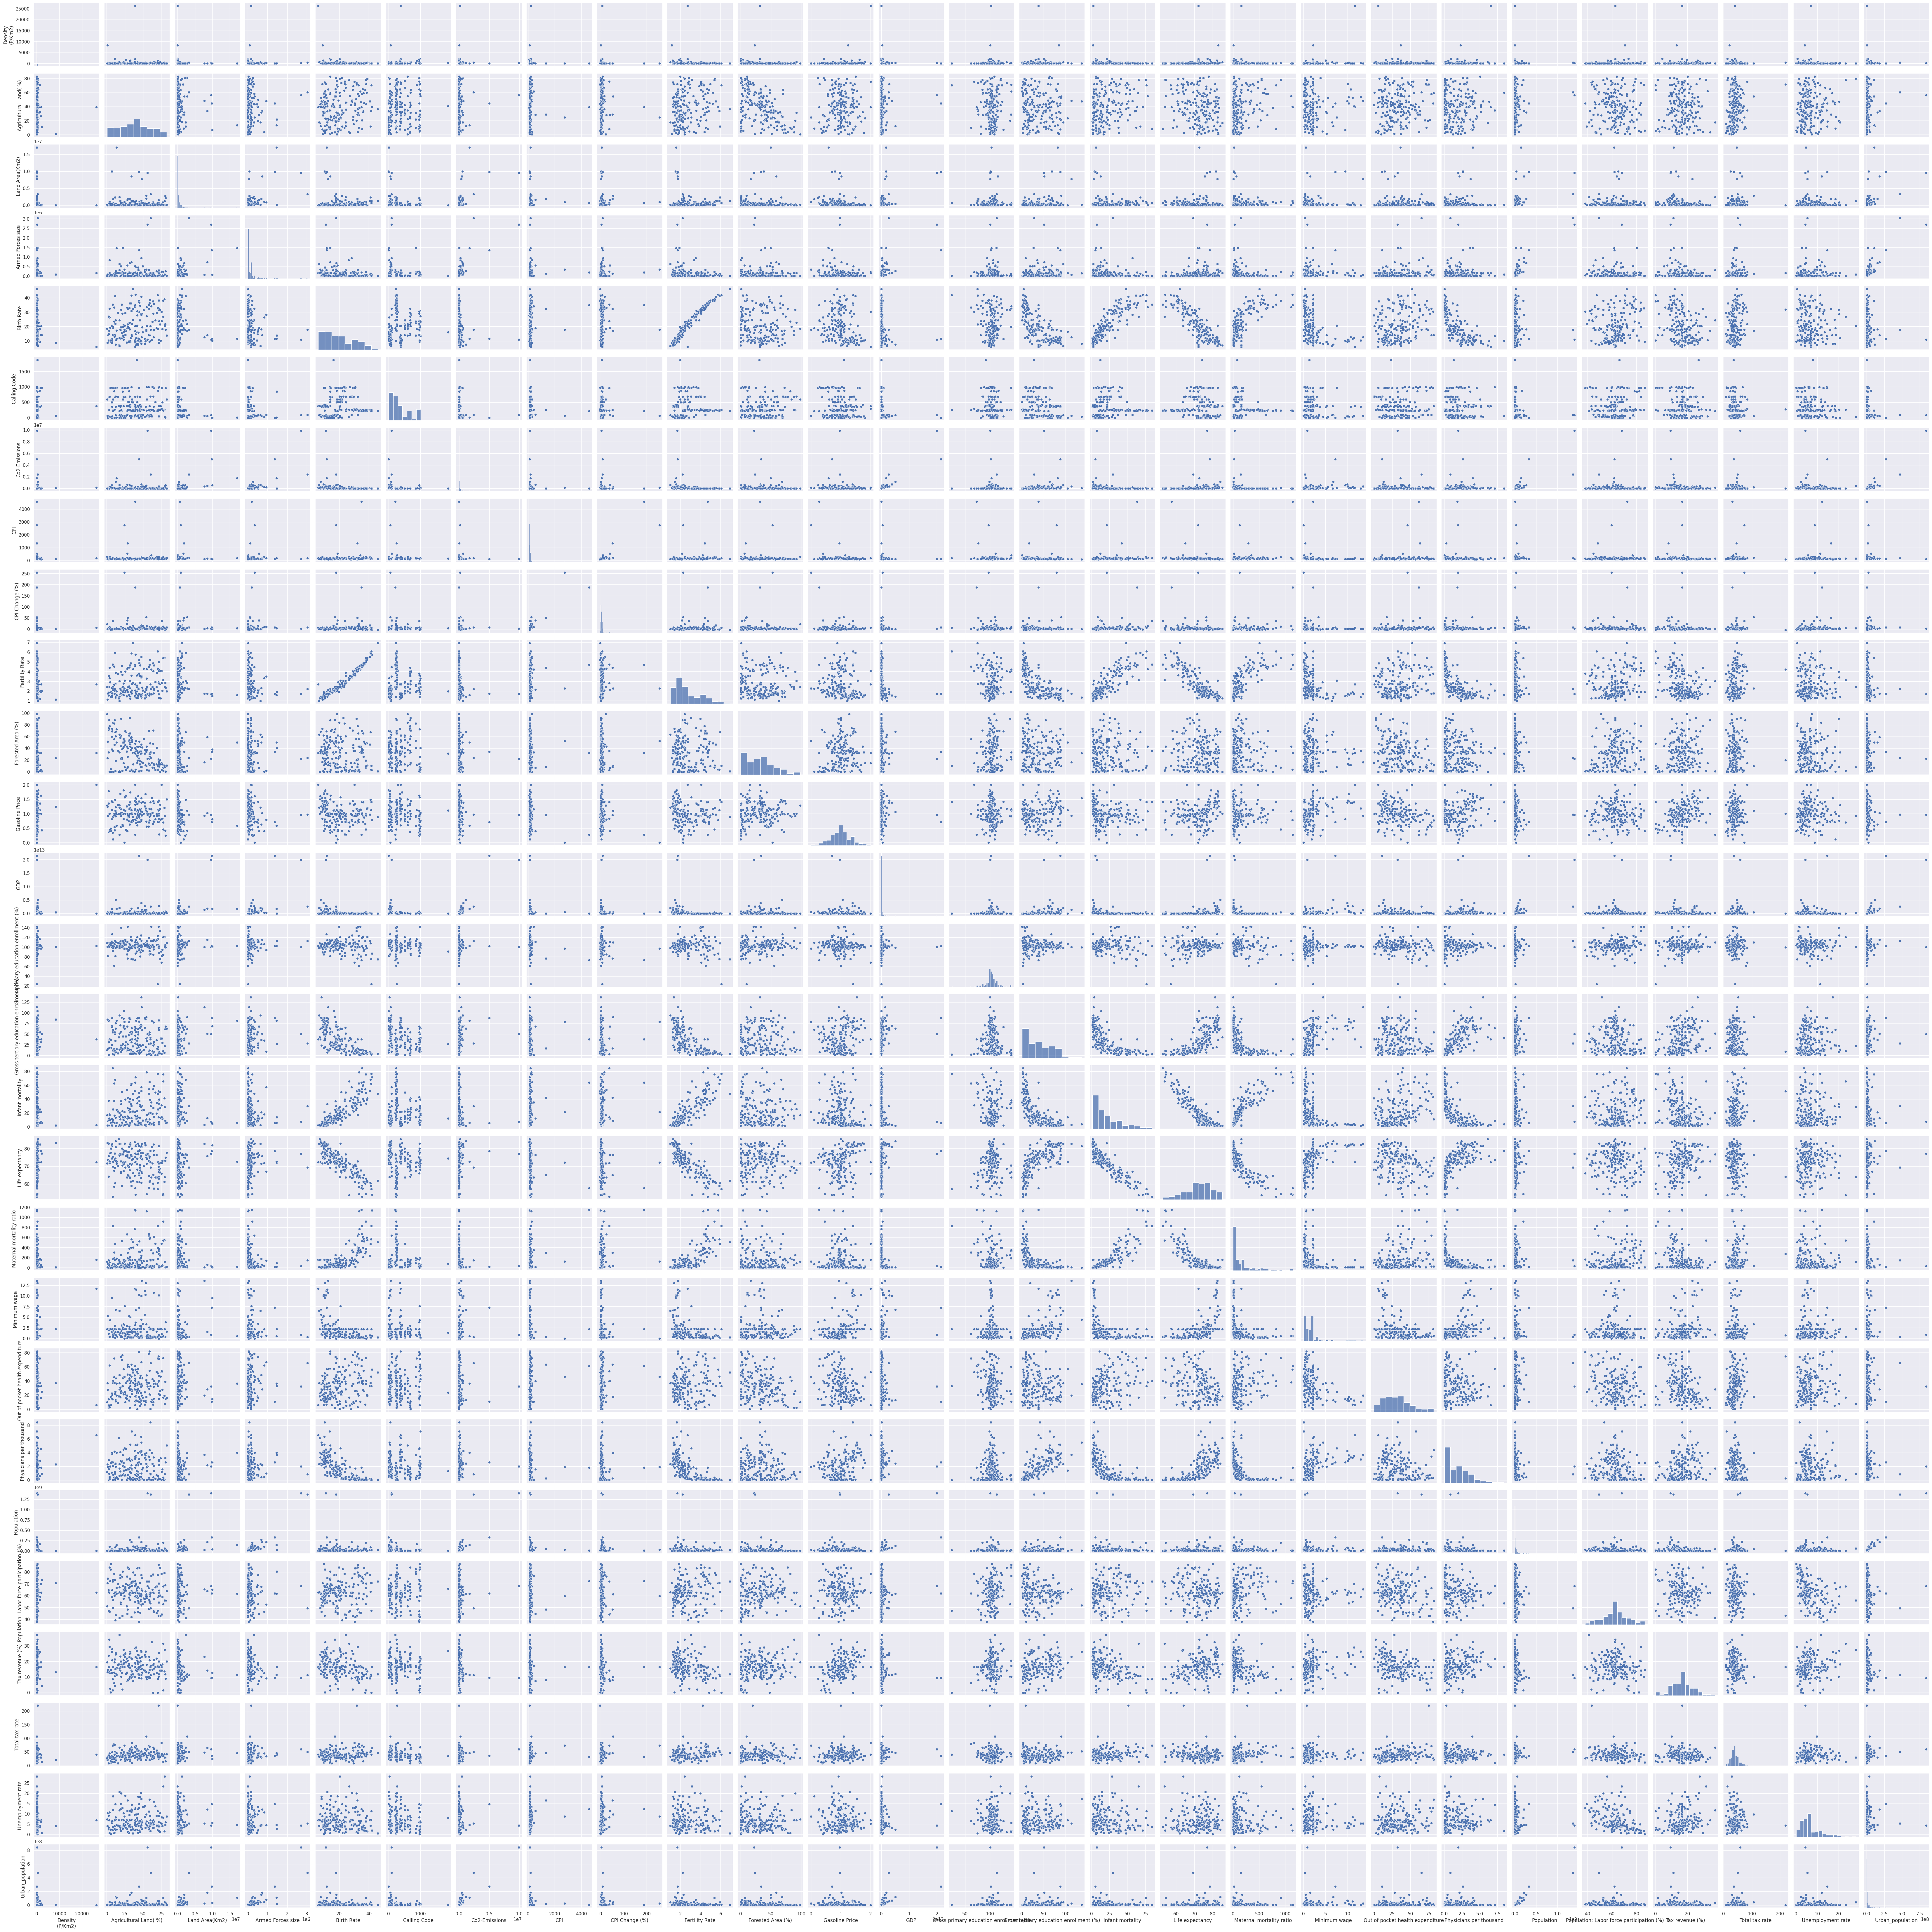

In [ ]:

sns.pairplot(data1.iloc[:,1:])
plt.show()


to do ----
1. per capita vs infant mortality
2. per capita vs life span
3. per capita vs birth rate
4. per capita vs physicians
5. physicians vs life span
6. physicians vs infant mortality rate
7. infant mortality vs life span

8. gdp per capita vs co2 emission


life span with bin...

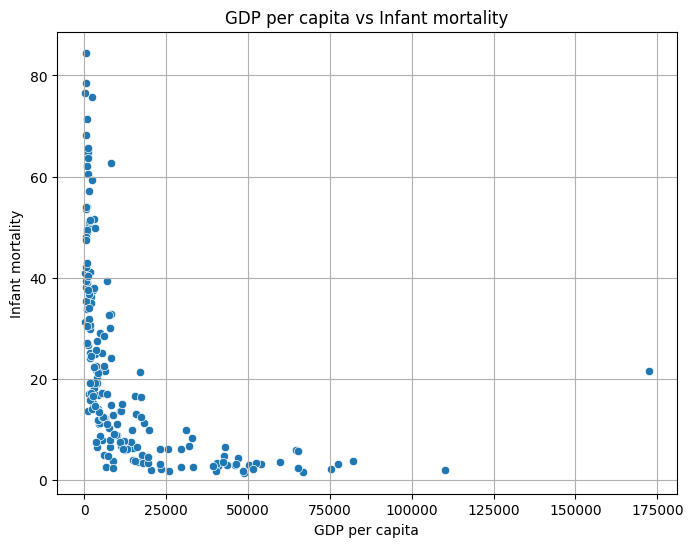

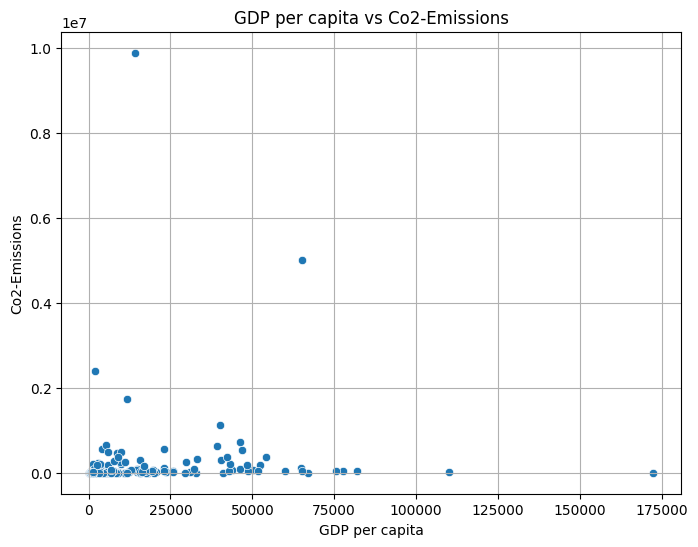

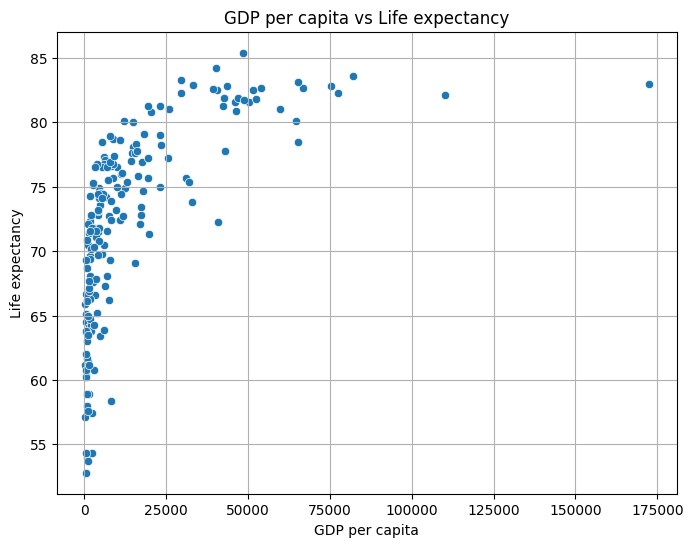

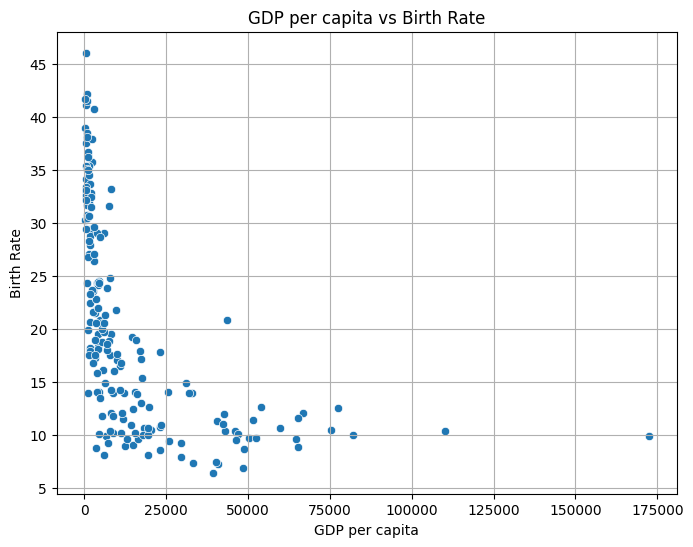

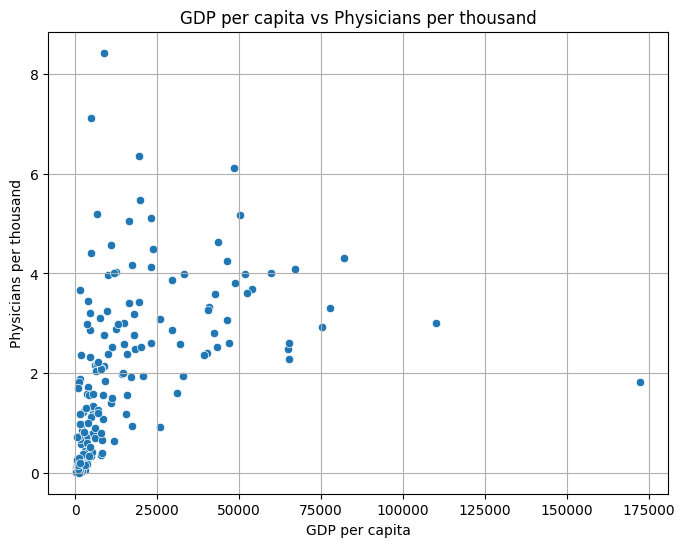

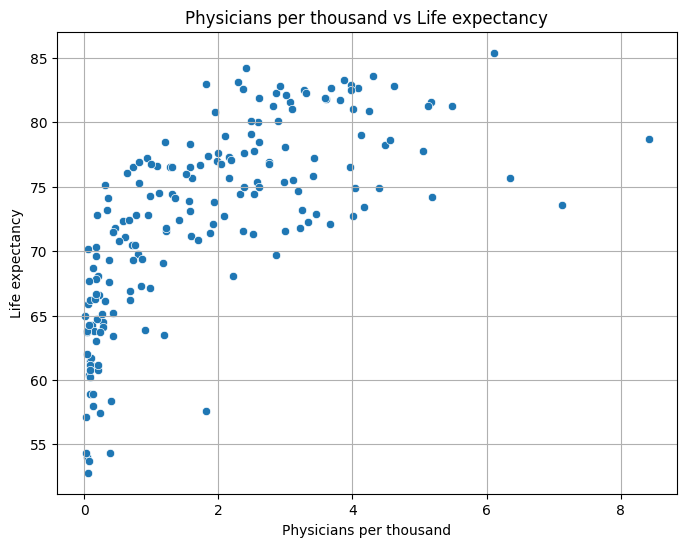

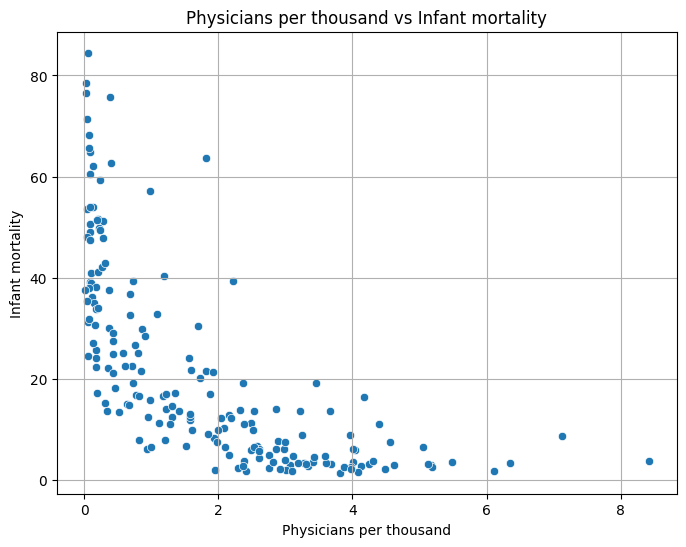

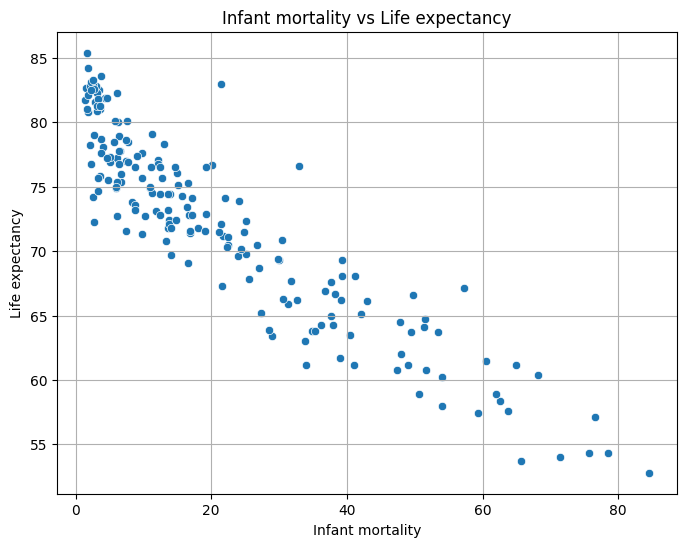

In [ ]:


def scatter_plot(df, x_var, y_var):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_var, y=y_var, data=df)
    plt.title(f'{x_var} vs {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.grid(True)
    plt.show()
    print('')

scatter_plot(data1, 'GDP per capita', 'Infant mortality')

scatter_plot(data1, 'GDP per capita', 'Co2-Emissions')

# Scatter plot: GDP per capita vs Life expectancy
scatter_plot(data1, 'GDP per capita', 'Life expectancy')

# Scatter plot: GDP per capita vs Birth Rate
scatter_plot(data1, 'GDP per capita', 'Birth Rate')

# Scatter plot: GDP per capita vs Physicians per thousand
scatter_plot(data1, 'GDP per capita', 'Physicians per thousand')

# Scatter plot: Physicians per thousand vs Life expectancy
scatter_plot(data1, 'Physicians per thousand', 'Life expectancy')

# Scatter plot: Physicians per thousand vs Infant mortality
scatter_plot(data1, 'Physicians per thousand', 'Infant mortality')

scatter_plot(data1, 'Infant mortality', 'Life expectancy')

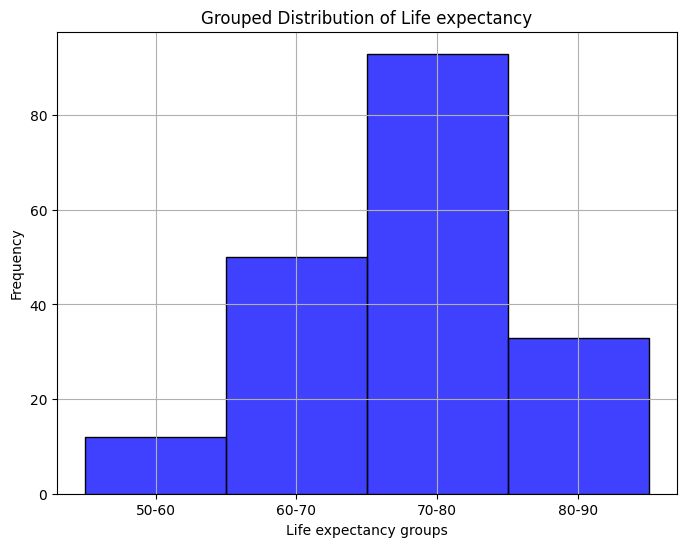

In [ ]:
bins = [0, 40,50, 60, 70,80,90, np.inf]
labels = ['<40', '40-50','50-60', '60-70','70-80', '80-90','>80']

# Bin life expectancy into the specified groups
data1['Life_expectancy_group'] = pd.cut(data1['Life expectancy'], bins=bins, labels=labels, right=False)

# Plotting the grouped distribution of Life expectancy
plt.figure(figsize=(8, 6))
sns.histplot(data1['Life_expectancy_group'], discrete=True, color='blue', edgecolor='black')
plt.title('Grouped Distribution of Life expectancy')
plt.xlabel('Life expectancy groups')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Model building

## Checking Multicolinearity

In [ ]:

dependent_colsm = data1.drop(['Country','Infant mortality'],axis = 1).columns
dependent_colsm

Index(['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI',
       'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Life expectancy',
       'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'GDP per capita'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X=data1[dependent_colsm]
y=data1['Infant mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")




8.32095515866024
Mean Squared Error: 69.23829475243446
R^2 Score: 0.891913423166205


In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]

    return(vif)

vif_df = calc_vif(X)
vif_df.sort_values(by='VIF',ascending=False)

variables   VIF
4                                  Birth Rate  54.6
24                           Urban_population  52.6
8                              Fertility Rate  44.9
19                                 Population  28.7
5                               Co2-Emissions  25.9
11                                        GDP  10.1
6                                         CPI   6.0
3                           Armed Forces size   5.7
7                              CPI Change (%)   5.6
15                   Maternal mortality ratio   3.7
18                    Physicians per thousand   3.2
13    Gross tertiary education enrollment (%)   3.1
25                             GDP per capita   2.3
2                              Land Area(Km2)   2.2
16                               Minimum wage   2.1
10                             Gasoline Price   1.8
17           Out of pocket health expenditure   1.7
21                            Tax revenue (%)   1.6
1                       Agricultural Land( %)   1.5
14                            Life expectancy   1.5
9                           Forested Area (%)   1.5
20  Population: Labor force participation (%)   1.5
22                             Total tax rate   1.4
23                          Unemployment rate   1.4
12     Gross primary education enrollment (%)   1.3
0                            Density\n(P/Km2)   1.2

In [ ]:
vif_df = calc_vif(X.drop(['Birth Rate'],axis=1))
(vif_df.sort_values(by='VIF',ascending=False))

variables   VIF
23                           Urban_population  52.4
18                                 Population  28.6
4                               Co2-Emissions  25.9
10                                        GDP  10.1
5                                         CPI   5.9
3                           Armed Forces size   5.6
6                              CPI Change (%)   5.5
14                   Maternal mortality ratio   3.7
7                              Fertility Rate   3.5
12    Gross tertiary education enrollment (%)   3.0
17                    Physicians per thousand   2.8
24                             GDP per capita   2.3
15                               Minimum wage   2.1
2                              Land Area(Km2)   2.1
9                              Gasoline Price   1.7
16           Out of pocket health expenditure   1.6
20                            Tax revenue (%)   1.6
1                       Agricultural Land( %)   1.5
13                            Life expectancy   1.5
8                           Forested Area (%)   1.5
19  Population: Labor force participation (%)   1.5
21                             Total tax rate   1.4
22                          Unemployment rate   1.4
11     Gross primary education enrollment (%)   1.2
0                            Density\n(P/Km2)   1.2

In [ ]:
vif_df = calc_vif(X.drop(['Urban_population','Birth Rate'],axis=1))
(vif_df.sort_values(by='VIF',ascending=False))

variables   VIF
4                               Co2-Emissions  16.9
10                                        GDP  10.1
18                                 Population   8.3
5                                         CPI   5.9
3                           Armed Forces size   5.6
6                              CPI Change (%)   5.5
14                   Maternal mortality ratio   3.7
7                              Fertility Rate   3.5
12    Gross tertiary education enrollment (%)   3.0
17                    Physicians per thousand   2.8
23                             GDP per capita   2.3
15                               Minimum wage   2.1
2                              Land Area(Km2)   2.0
9                              Gasoline Price   1.7
16           Out of pocket health expenditure   1.6
20                            Tax revenue (%)   1.6
1                       Agricultural Land( %)   1.5
13                            Life expectancy   1.5
8                           Forested Area (%)   1.5
19  Population: Labor force participation (%)   1.5
22                          Unemployment rate   1.4
21                             Total tax rate   1.3
11     Gross primary education enrollment (%)   1.2
0                            Density\n(P/Km2)   1.2

In [ ]:
vif_df = calc_vif(X.drop(['Urban_population','Birth Rate','Co2-Emissions'],axis=1))
(vif_df.sort_values(by='VIF',ascending=False))

variables  VIF
4                                         CPI  5.9
5                              CPI Change (%)  5.5
3                           Armed Forces size  5.4
17                                 Population  5.2
13                   Maternal mortality ratio  3.6
6                              Fertility Rate  3.5
11    Gross tertiary education enrollment (%)  3.0
16                    Physicians per thousand  2.8
9                                         GDP  2.4
22                             GDP per capita  2.2
14                               Minimum wage  2.0
2                              Land Area(Km2)  1.9
8                              Gasoline Price  1.7
19                            Tax revenue (%)  1.6
1                       Agricultural Land( %)  1.5
12                            Life expectancy  1.5
15           Out of pocket health expenditure  1.5
7                           Forested Area (%)  1.5
18  Population: Labor force participation (%)  1.5
21                          Unemployment rate  1.4
20                             Total tax rate  1.3
10     Gross primary education enrollment (%)  1.2
0                            Density\n(P/Km2)  1.2

In [ ]:
x_nomulti_colinearity=X.drop(['Urban_population','Birth Rate','Co2-Emissions'],axis=1)

import statsmodels.api as sm

x_train_constant = sm.add_constant(x_nomulti_colinearity)

model = sm.OLS(y, x_train_constant).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     73.82
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           2.47e-74
Time:                        10:34:39   Log-Likelihood:                -596.83
No. Observations:                 188   AIC:                             1242.
Df Residuals:                     164   BIC:                             1319.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop('Density\n(P/Km2)',axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     77.64
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           2.77e-75
Time:                        00:41:36   Log-Likelihood:                -596.83
No. Observations:                 188   AIC:                             1240.
Df Residuals:                     165   BIC:                             1314.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     81.83
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           3.02e-76
Time:                        00:42:30   Log-Likelihood:                -596.83
No. Observations:                 188   AIC:                             1238.
Df Residuals:                     166   BIC:                             1309.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     86.44
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           3.22e-77
Time:                        00:43:38   Log-Likelihood:                -596.84
No. Observations:                 188   AIC:                             1236.
Df Residuals:                     167   BIC:                             1304.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     91.52
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           3.33e-78
Time:                        00:45:00   Log-Likelihood:                -596.84
No. Observations:                 188   AIC:                             1234.
Df Residuals:                     168   BIC:                             1298.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     97.16
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           3.40e-79
Time:                        00:45:51   Log-Likelihood:                -596.87
No. Observations:                 188   AIC:                             1232.
Df Residuals:                     169   BIC:                             1293.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)','Unemployment rate'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     103.4
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           3.39e-80
Time:                        00:47:08   Log-Likelihood:                -596.90
No. Observations:                 188   AIC:                             1230.
Df Residuals:                     170   BIC:                             1288.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)','Unemployment rate','Tax revenue (%)'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     110.4
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           3.41e-81
Time:                        00:47:57   Log-Likelihood:                -596.99
No. Observations:                 188   AIC:                             1228.
Df Residuals:                     171   BIC:                             1283.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)','Unemployment rate','Tax revenue (%)','GDP'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     118.4
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           3.29e-82
Time:                        00:48:47   Log-Likelihood:                -597.06
No. Observations:                 188   AIC:                             1226.
Df Residuals:                     172   BIC:                             1278.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)','Unemployment rate','Tax revenue (%)','GDP','Population'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           3.39e-83
Time:                        00:49:40   Log-Likelihood:                -597.25
No. Observations:                 188   AIC:                             1224.
Df Residuals:                     173   BIC:                             1273.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)','Unemployment rate','Tax revenue (%)','GDP','Population','Agricultural Land( %)'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     137.2
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           4.30e-84
Time:                        00:50:33   Log-Likelihood:                -597.70
No. Observations:                 188   AIC:                             1223.
Df Residuals:                     174   BIC:                             1269.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)','Unemployment rate','Tax revenue (%)','GDP','Population','Agricultural Land( %)','Forested Area (%)'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     149.1
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           4.19e-85
Time:                        00:51:14   Log-Likelihood:                -597.92
No. Observations:                 188   AIC:                             1222.
Df Residuals:                     175   BIC:                             1264.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)','Unemployment rate','Tax revenue (%)','GDP','Population','Agricultural Land( %)','Forested Area (%)','Gasoline Price'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     163.0
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           4.14e-86
Time:                        00:51:54   Log-Likelihood:                -598.19
No. Observations:                 188   AIC:                             1220.
Df Residuals:                     176   BIC:                             1259.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)','Unemployment rate','Tax revenue (%)','GDP','Population','Agricultural Land( %)','Forested Area (%)','Gasoline Price','Total tax rate'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     178.6
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           6.64e-87
Time:                        00:52:55   Log-Likelihood:                -599.04
No. Observations:                 188   AIC:                             1220.
Df Residuals:                     177   BIC:                             1256.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)','Unemployment rate','Tax revenue (%)','GDP','Population','Agricultural Land( %)','Forested Area (%)','Gasoline Price','Total tax rate','CPI Change (%)'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     196.4
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.60e-87
Time:                        00:53:33   Log-Likelihood:                -600.37
No. Observations:                 188   AIC:                             1221.
Df Residuals:                     178   BIC:                             1253.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)','Unemployment rate','Tax revenue (%)','GDP','Population','Agricultural Land( %)','Forested Area (%)','Gasoline Price','Total tax rate','CPI Change (%)','CPI'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     221.6
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.34e-88
Time:                        00:54:08   Log-Likelihood:                -600.64
No. Observations:                 188   AIC:                             1219.
Df Residuals:                     179   BIC:                             1248.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)','Unemployment rate','Tax revenue (%)','GDP','Population','Agricultural Land( %)','Forested Area (%)','Gasoline Price','Total tax rate','CPI Change (%)','CPI','Population: Labor force participation (%)'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     250.1
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           3.43e-89
Time:                        10:58:01   Log-Likelihood:                -602.15
No. Observations:                 188   AIC:                             1220.
Df Residuals:                     180   BIC:                             1246.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
model = sm.OLS(y, x_train_constant.drop(['Density\n(P/Km2)','Armed Forces size','Minimum wage','Land Area(Km2)','Gross primary education enrollment (%)','Unemployment rate','Tax revenue (%)','GDP','Population','Agricultural Land( %)','Forested Area (%)','Gasoline Price','Total tax rate','CPI Change (%)','CPI','Population: Labor force participation (%)','Gross tertiary education enrollment (%)'],axis=1)).fit()

# Print the summary to get p-values
print(model.summary())
print(model.pvalues.sort_values(ascending=False).round(4))

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     286.8
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           1.23e-89
Time:                        10:58:32   Log-Likelihood:                -604.09
No. Observations:                 188   AIC:                             1222.
Df Residuals:                     181   BIC:                             1245.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
sorted_params=model.params.sort_values(ascending=False)
sorted_params

const                               107.852061
Fertility Rate                        2.467270
Out of pocket health expenditure      0.087000
Maternal mortality ratio              0.023425
GDP per capita                        0.000088
Physicians per thousand              -1.184523
Life expectancy                      -1.367898
dtype: float64

From <strong>Ordinary Least squares</strong> analysis it can be noted that the variable which are significant in predicting the Infant Mortality rate is given by the equation as follows:
$ y(Infant Mortality) =   107.8   -1.36789( Life Expectancy) + 0.023425( Maternal \space mortality\space ratio) + 0.00008 ( GDP per capita) +2.467270( Fertility\space Rate) -1.184523 (Physicians \space per\space thousand)+0.087(Out\space of \space pocket \space health \space expenditure)$

## Mulitple regression

In [ ]:
# Correlation of the significant features with Infant mortality.

now =data1[['Life expectancy','Maternal mortality ratio','GDP per capita','Fertility Rate','Physicians per thousand','Out of pocket health expenditure','Infant mortality']]
now.corr()['Infant mortality']

Life expectancy                    -0.917300
Maternal mortality ratio            0.867542
GDP per capita                     -0.464365
Fertility Rate                      0.850444
Physicians per thousand            -0.685312
Out of pocket health expenditure    0.340843
Infant mortality                    1.000000
Name: Infant mortality, dtype: float64

In [ ]:
X

Life expectancy  Maternal mortality ratio  GDP per capita  \
0          64.500000                638.000000       -0.649044   
1          78.500000                 15.000000       -0.431699   
2          76.700000                112.000000       -0.494630   
3          72.279679                160.392265        1.160439   
4          60.800000                241.000000       -0.538305   
..               ...                       ...             ...   
190        72.100000                125.000000        0.086384   
191        75.300000                 43.000000       -0.549880   
192        66.100000                164.000000       -0.630189   
193        63.500000                213.000000       -0.613681   
194        61.200000                458.000000       -0.605946   

     Fertility Rate  Physicians per thousand  Out of pocket health expenditure  
0              4.47                     0.28                              78.4  
1              1.62                     1.20                              56.9  
2              3.02                     1.72                              28.1  
3              1.27                     3.33                              36.4  
4              5.52                     0.21                              33.4  
..              ...                      ...                               ...  
190            2.27                     1.92                              45.8  
191            2.05                     0.82                              43.5  
192            3.79                     0.31                              81.0  
193            4.63                     1.19                              27.5  
194            3.62                     0.21                              25.8  

[188 rows x 6 columns]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



X=data1[['Life expectancy','Maternal mortality ratio','GDP per capita','Fertility Rate','Physicians per thousand','Out of pocket health expenditure']]
y=data1['Infant mortality']

scaler = StandardScaler()
X['GDP per capita']=scaler.fit_transform(X[['GDP per capita']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"R^2 score for train is {r2_score(y_train, lm2.predict(X_train))}")
print(f"R^2 score for test is {r2_score(y_test, lm2.predict(X_test))}")
print(f"coeffiecients are : ",[i.round(4) for i in lm2.coef_])
print(f"intercept is : ",lm2.intercept_.round(4))


Mean Squared Error: 39.315499691010736
R^2 Score: 0.9325600605022888
R^2 score for train is 0.8794921865777562
R^2 score for test is 0.9325600605022888
coeffiecients are :  [-1.2401, 0.0214, 1.7559, 2.7963, -1.2371, 0.0958]
intercept is :  99.0109


<ipython-input-14-8a0eea7b636c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GDP per capita']=scaler.fit_transform(X[['GDP per capita']])


In [ ]:
#checking the multicollinearity again after scaling the GDP per capita

vif_df = calc_vif(X)
(vif_df.sort_values(by='VIF',ascending=False))

variables   VIF
0                   Life expectancy  19.3
3                    Fertility Rate  16.0
5  Out of pocket health expenditure   4.7
4           Physicians per thousand   4.5
1          Maternal mortality ratio   4.2
2                    GDP per capita   1.6

In [ ]:
vif_df = calc_vif(X.drop(['Life expectancy'],axis=1))
(vif_df.sort_values(by='VIF',ascending=False))


variables  VIF
2                    Fertility Rate  5.9
4  Out of pocket health expenditure  4.0
0          Maternal mortality ratio  3.3
3           Physicians per thousand  2.5
1                    GDP per capita  1.4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(['Life expectancy'], axis = 1), y, test_size=0.25, random_state=0)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"R^2 score for train is {r2_score(y_train, lm2.predict(X_train))}")
print(f"R^2 score for test is {r2_score(y_test, lm2.predict(X_test))}")
print(f"coeffiecients are : ",[i.round(4) for i in lm2.coef_])
print(f"intercept is : ",lm2.intercept_.round(4))

Mean Squared Error: 68.53965129216951
R^2 Score: 0.8824303398744542
R^2 score for train is 0.8436114687396234
R^2 score for test is 0.8824303398744542
coeffiecients are :  [0.0364, -0.2894, 5.2759, -1.9535, 0.1207]
intercept is :  0.3651


In [ ]:
# now agin checking the correlation matrix.

now =data1[['Maternal mortality ratio','GDP per capita','Fertility Rate','Physicians per thousand','Out of pocket health expenditure','Infant mortality']]
now.corr()['Infant mortality']

Maternal mortality ratio            0.867542
GDP per capita                     -0.464365
Fertility Rate                      0.850444
Physicians per thousand            -0.685312
Out of pocket health expenditure    0.340843
Infant mortality                    1.000000
Name: Infant mortality, dtype: float64

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y,sm.add_constant(X.drop(['Life expectancy'],axis = 1))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     235.1
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           2.08e-77
Time:                        11:39:57   Log-Likelihood:                -636.31
No. Observations:                 188   AIC:                             1285.
Df Residuals:                     182   BIC:                             1304.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
model = sm.OLS(y,sm.add_constant(X.drop(['Life expectancy','GDP per capita'],axis = 1))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     294.2
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.59e-78
Time:                        11:44:15   Log-Likelihood:                -636.66
No. Observations:                 188   AIC:                             1283.
Df Residuals:                     183   BIC:                             1300.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

## homoscedasticity check

In [ ]:
model = sm.OLS(np.log(y),sm.add_constant(X.drop(['Life expectancy','GDP per capita'],axis = 1))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     187.1
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.62e-63
Time:                        11:46:39   Log-Likelihood:                -125.40
No. Observations:                 188   AIC:                             260.8
Df Residuals:                     183   BIC:                             277.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

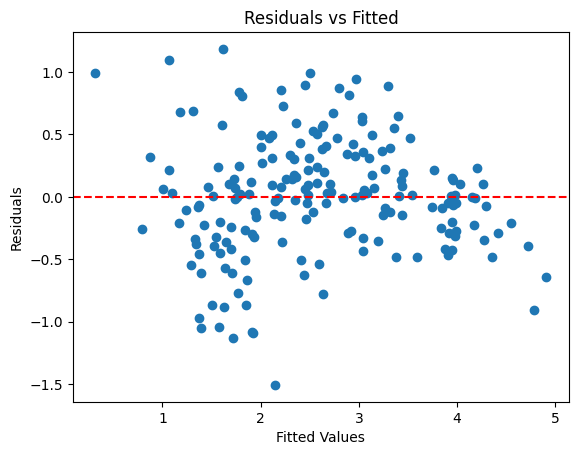

In [ ]:
import matplotlib.pyplot as plt

# Get the residuals
residuals = model.resid

# Plot residuals
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


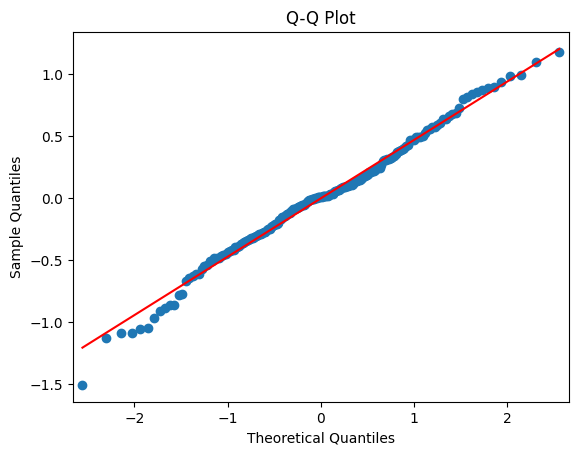

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot')
plt.show()


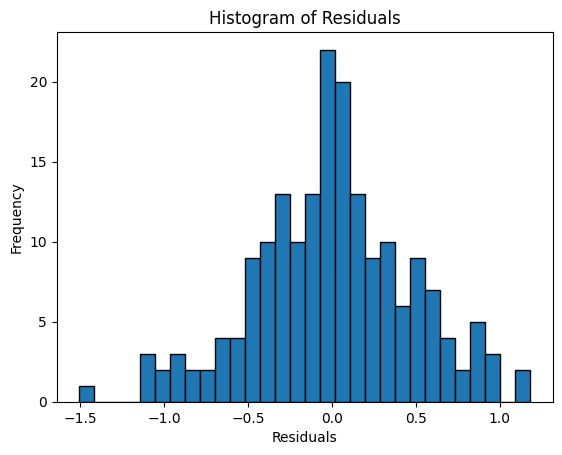

In [ ]:
plt.hist(model.resid, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


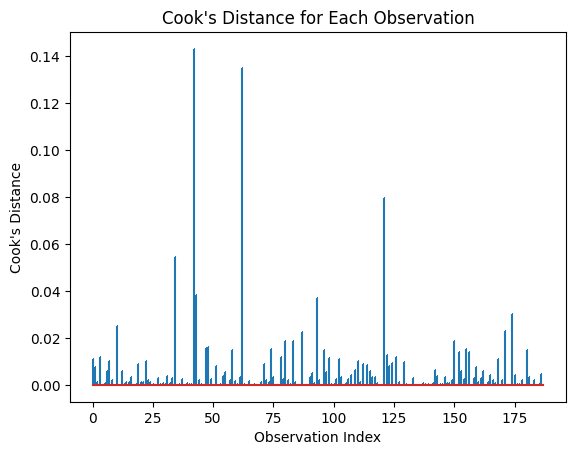

Outliers detected at indices: [ 10  34  42  43  62  87  93 121 171 174]


In [ ]:
import numpy as np

influence = model.get_influence()
(c, p) = influence.cooks_distance

plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")
plt.show()

# Threshold for Cook's distance - typically 4/n or 4/(n-k-1)
threshold = 4 / len(X)
outliers = np.where(c > threshold)[0]
print("Outliers detected at indices:", outliers)


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
print("FOR DIFFERENT TRAIN TEST SPLITS: MULTIPLEREGRESSION")
for i in [0.2,0.25,0.3,0.4]:
  X_train, X_test, y_train, y_test = train_test_split(X.drop(['Life expectancy'], axis = 1), y, test_size=i, random_state=0)

  # instantiate and fit
  lm2 = LinearRegression()
  lm2.fit(X_train, y_train)
  y_pred = lm2.predict(X_train)

  r2 = r2_score(y_train, y_pred)
  print("---------------\n")
  print(f"R^2 Score for the training set {(1-i)*100}% is : {r2.round(4)}")

  y_pred = lm2.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  print(f"R^2 Score for the testing {(i)*100}%  set is : {r2.round(4)}")
  print("Mean squared error:",(metrics.mean_squared_error(y_test, y_pred)))



FOR DIFFERENT TRAIN TEST SPLITS: MULTIPLEREGRESSION
---------------

R^2 Score for the training set 80.0% is : 0.8457
R^2 Score for the testing 20.0%  set is : 0.8714
Mean squared error: 82.35338251505438
---------------

R^2 Score for the training set 75.0% is : 0.8436
R^2 Score for the testing 25.0%  set is : 0.8824
Mean squared error: 68.53965129216951
---------------

R^2 Score for the training set 70.0% is : 0.8514
R^2 Score for the testing 30.0%  set is : 0.8747
Mean squared error: 64.71131244567077
---------------

R^2 Score for the training set 60.0% is : 0.8523
R^2 Score for the testing 40.0%  set is : 0.8627
Mean squared error: 66.41585377285963


Before multicoliearity and feature selection and significant features:<br>
8.32095515866024<br>
<tr>Mean Squared Error: 69.23829475243446<br><tr
$R^2$ Score: 0.891913423166205
<br>-------------------------------<br>
After selecting the significant features<br>

$R^2$ Score for the training set is : 0.882<br>
$R^2$ Score for the testing set is : 0.923

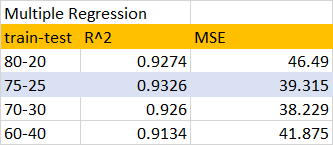

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)

print(lm2.coef_.round(3),"and the r2 is : ",r2_score(y_pred,y_test))
print(lm2.intercept_.round(3))


[-1.24   0.021  0.     2.796 -1.237  0.096] and the r2 is :  0.9119113965633582
97.832


In [ ]:
X

Life expectancy  Maternal mortality ratio  GDP per capita  \
0          64.500000                638.000000      502.115487   
1          78.500000                 15.000000     5352.857411   
2          76.700000                112.000000     3948.343279   
3          72.279679                160.392265    40886.391162   
4          60.800000                241.000000     2973.591160   
..               ...                       ...             ...   
190        72.100000                125.000000    16915.493453   
191        75.300000                 43.000000     2715.276036   
192        66.100000                164.000000      922.929642   
193        63.500000                213.000000     1291.343357   
194        61.200000                458.000000     1463.985910   

     Fertility Rate  Physicians per thousand  Out of pocket health expenditure  
0              4.47                     0.28                              78.4  
1              1.62                     1.20                              56.9  
2              3.02                     1.72                              28.1  
3              1.27                     3.33                              36.4  
4              5.52                     0.21                              33.4  
..              ...                      ...                               ...  
190            2.27                     1.92                              45.8  
191            2.05                     0.82                              43.5  
192            3.79                     0.31                              81.0  
193            4.63                     1.19                              27.5  
194            3.62                     0.21                              25.8  

[188 rows x 6 columns]

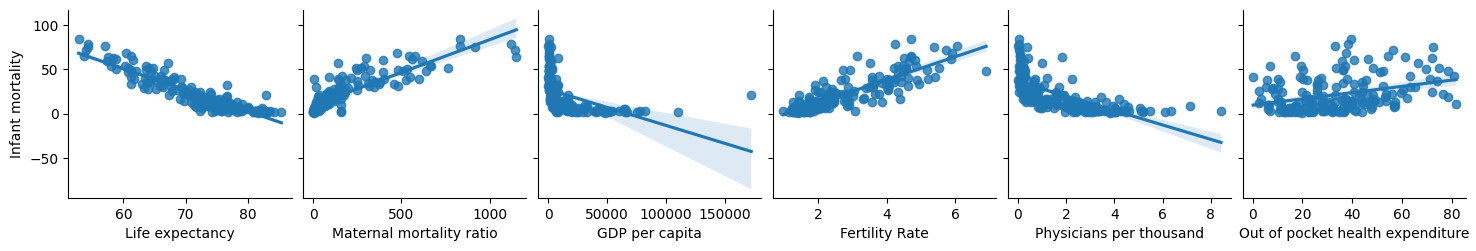

In [ ]:
sns.pairplot(data1,x_vars=X.columns,y_vars=['Infant mortality'],kind='reg')
plt.show()


7

In [ ]:
# three dataset needs to be compared
x = data1.drop(['Country'],axis = 1) #complete dataset
x_nomulti_colinearity=data1.drop(['Country','Urban_population','Birth Rate','Co2-Emissions'],axis=1)
y=data1['Infant mortality'] #only no

## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

for i in [x_nomulti_colinearity]:
  X_train, X_test, y_train, y_test = train_test_split(i, y, test_size=0.2, random_state=0)
  regressor = DecisionTreeRegressor(max_features=4,min_samples_leaf=3,max_depth=3)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print("\nTrain Mean Squared Error: ", mean_squared_error(y_train, regressor.predict(X_train)).round(3))
  print("Test Mean Squared Error: ", mean_squared_error(y_test, y_pred).round(3))
  print("\nTrain R^2 Score: ", r2_score(y_train, regressor.predict(X_train)).round(3))
  print("Test R^2 Score: ", r2_score(y_test, y_pred).round(3))




Train Mean Squared Error:  41.865
Test Mean Squared Error:  135.68

Train R^2 Score:  0.855
Test R^2 Score:  0.788


In [ ]:
X=x_nomulti_colinearity
y=data1['Infant mortality']
y.shape

(188,)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

for i in [0.2,0.25,0.3,0.4]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=0)

  model = DecisionTreeRegressor(max_features=3,min_samples_leaf=4,max_depth=3)  #min_samples_leaf=2,min_samples_split=10,random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_train)

  r2 = r2_score(y_train, y_pred)
  print("---------------\n")
  print(f"R^2 Score for the training set {(1-i)*100}% is : {r2.round(4)}")

  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  print(f"R^2 Score for the testing {(i)*100}%  set is : {r2.round(4)}")
  print("Mean squared error:",(metrics.mean_squared_error(y_test, y_pred)))


---------------

R^2 Score for the training set 80.0% is : 0.8572
R^2 Score for the testing 20.0%  set is : 0.7305
Mean squared error: 172.66358681506784
---------------

R^2 Score for the training set 75.0% is : 0.8007
R^2 Score for the testing 25.0%  set is : 0.744
Mean squared error: 149.21363454395362
---------------

R^2 Score for the training set 70.0% is : 0.8617
R^2 Score for the testing 30.0%  set is : 0.6925
Mean squared error: 158.81483104972946
---------------

R^2 Score for the training set 60.0% is : 0.8732
R^2 Score for the testing 40.0%  set is : 0.7293
Mean squared error: 130.90427746828232


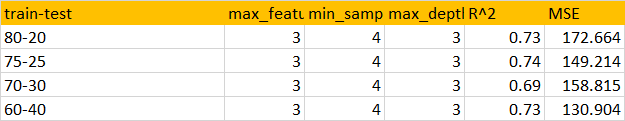

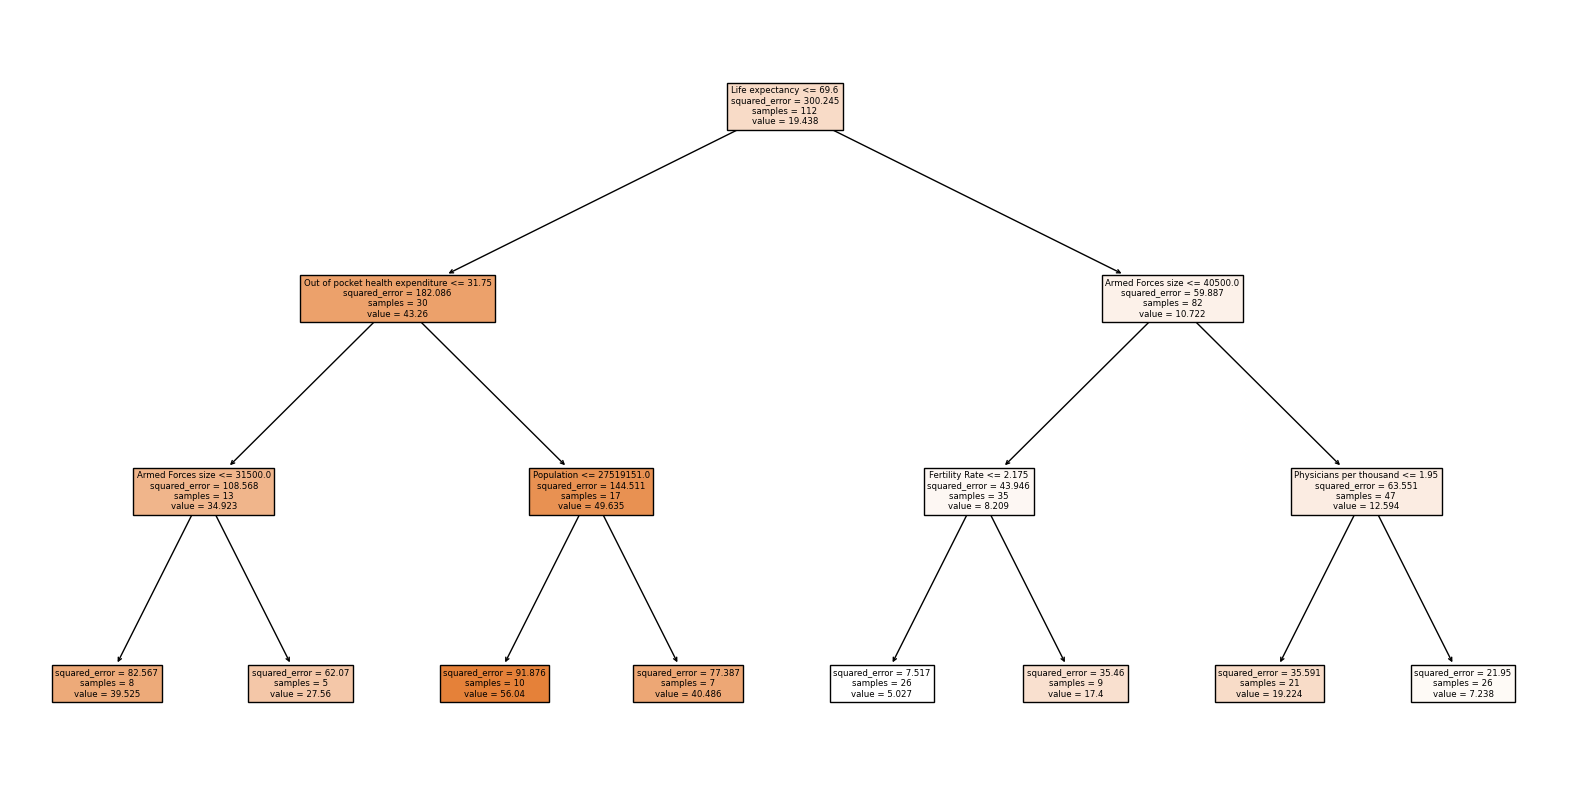

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))  # Set the size of the plot
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(x_nomulti_colinearity, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor(max_features=4,min_samples_leaf=3,max_depth=3)

regressor.fit(X_train, y_train)
print("--------------")

y_pred = regressor.predict(X_test)


print("Train Mean Squared Error: ", mean_squared_error(y_train, regressor.predict(X_train)).round(3))
print("Test Mean Squared Error: ", mean_squared_error(y_test, y_pred).round(3))
print()
print("Train R^2 Score: ", r2_score(y_train, regressor.predict(X_train)).round(3))
print("Test R^2 Score: ", r2_score(y_test, y_pred.round(3)))

--------------
Train Mean Squared Error:  17.62
Test Mean Squared Error:  110.466

Train R^2 Score:  0.939
Test R^2 Score:  0.8275555428062481


In [ ]:
from sklearn.ensemble import RandomForestRegressor

for i in [0.2,0.25,0.3,0.4]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=0)

  model = RandomForestRegressor(n_estimators=100,
                                max_depth=3,
                                min_samples_leaf=2,
                                min_samples_split=2,
                                max_features=4)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_train)


  r2 = r2_score(y_train, y_pred)
  print("---------------\n")
  print(f"R^2 Score for the training set {(1-i)*100}% is : {r2.round(4)}")

  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  print(f"R^2 Score for the testing {(i)*100}%  set is : {r2.round(4)}")
  print("Mean squared error:",(metrics.mean_squared_error(y_test, y_pred)))



---------------

R^2 Score for the training set 80.0% is : 0.9448
R^2 Score for the testing 20.0%  set is : 0.8356
Mean squared error: 105.33856928232758
---------------

R^2 Score for the training set 75.0% is : 0.9454
R^2 Score for the testing 25.0%  set is : 0.8594
Mean squared error: 81.95517532375042
---------------

R^2 Score for the training set 70.0% is : 0.9511
R^2 Score for the testing 30.0%  set is : 0.8603
Mean squared error: 72.14949593202137
---------------

R^2 Score for the training set 60.0% is : 0.955
R^2 Score for the testing 40.0%  set is : 0.8472
Mean squared error: 73.86934966045081


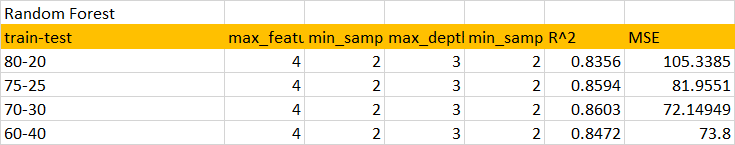

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_array = y.to_numpy()
y_reshaped = y_array.reshape(-1, 1)


y_scaled = pd.DataFrame(scaler.fit_transform(y_reshaped), columns=['Infant mortality'])

for i in [x_nomulti_colinearity]:
  # Fit the scaler to the data and transform it
  df_standardized = pd.DataFrame(scaler.fit_transform(i), columns=i.columns)
  X_train, X_test, y_train, y_test = train_test_split(df_standardized, y_scaled, test_size=0.2, random_state=0)
  for j in range(1,20):
    model=KNeighborsRegressor(n_neighbors=j)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'-----N={j}----')
    print("Train Mean Squared Error: ", mean_squared_error(y_train, model.predict(X_train)).round(3))
    print("Test Mean Squared Error: ", mean_squared_error(y_test, y_pred).round(3))
    print()
    print("Train R^2 Score: ", r2_score(y_train, model.predict(X_train)).round(3))
    print("Test R^2 Score: ", r2_score(y_test, y_pred).round(3))


-----N=1----
Train Mean Squared Error:  0.0
Test Mean Squared Error:  0.619

Train R^2 Score:  1.0
Test R^2 Score:  0.633
-----N=2----
Train Mean Squared Error:  0.046
Test Mean Squared Error:  0.414

Train R^2 Score:  0.94
Test R^2 Score:  0.754
-----N=3----
Train Mean Squared Error:  0.063
Test Mean Squared Error:  0.332

Train R^2 Score:  0.917
Test R^2 Score:  0.803
-----N=4----
Train Mean Squared Error:  0.076
Test Mean Squared Error:  0.296

Train R^2 Score:  0.9
Test R^2 Score:  0.824
-----N=5----
Train Mean Squared Error:  0.091
Test Mean Squared Error:  0.289

Train R^2 Score:  0.88
Test R^2 Score:  0.829
-----N=6----
Train Mean Squared Error:  0.095
Test Mean Squared Error:  0.311

Train R^2 Score:  0.876
Test R^2 Score:  0.815
-----N=7----
Train Mean Squared Error:  0.103
Test Mean Squared Error:  0.357

Train R^2 Score:  0.865
Test R^2 Score:  0.788
-----N=8----
Train Mean Squared Error:  0.105
Test Mean Squared Error:  0.356

Train R^2 Score:  0.862
Test R^2 Score:  0.789


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

for i in [0.2,0.25,0.3,0.4]:
  X_train, X_test, y_train, y_test = train_test_split(df_standardized, y_scaled, test_size=i, random_state=0)

  model = KNeighborsRegressor(n_neighbors=10)## neeed a change

  # Training the model on the training data
  model.fit(X_train, y_train)

  # Predicting on the test data
  y_pred = model.predict(X_train)


  r2 = r2_score(y_train, y_pred)
  print("---------------\n")
  print(f"R^2 Score for the training set {(1-i)*100}% is : {r2.round(4)}")

  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  print(f"R^2 Score for the testing {(i)*100}%  set is : {r2.round(4)}")
  print("Mean squared error:",(metrics.mean_squared_error(y_test, y_pred)))


---------------

R^2 Score for the training set 80.0% is : 0.8531
R^2 Score for the testing 20.0%  set is : 0.8028
Mean squared error: 0.3321298770843237
---------------

R^2 Score for the training set 75.0% is : 0.8488
R^2 Score for the testing 25.0%  set is : 0.8204
Mean squared error: 0.27530792557404
---------------

R^2 Score for the training set 70.0% is : 0.8585
R^2 Score for the testing 30.0%  set is : 0.807
Mean squared error: 0.2621990206455496
---------------

R^2 Score for the training set 60.0% is : 0.8614
R^2 Score for the testing 40.0%  set is : 0.8018
Mean squared error: 0.25211832441689647


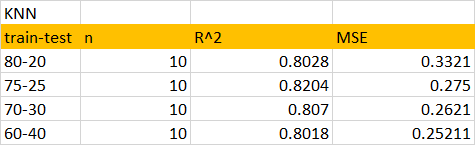

## Suport Vector Machine(SVM)

In [ ]:
X=x_nomulti_colinearity
y=data1['Infant mortality']
y.shape

(188,)

In [ ]:
print(X.shape)
print(y.shape)

(188, 24)
(188,)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

y=data1['Infant mortality']
y_array = y.to_numpy()
y_reshaped = y_array.reshape(-1, 1)

# Transform the target variable and put it in a DataFrame
y = pd.DataFrame(scaler.fit_transform(y_reshaped), columns=['Infant mortality'])

for i in [x_nomulti_colinearity]:
  df_standardized = pd.DataFrame(scaler.fit_transform(i), columns=i.columns)
  X_train, X_test, y_train, y_test = train_test_split(df_standardized, y, test_size=0.2, random_state=0)
  for j in [0.1,0.2,0.4,0.6,0.79,0.88,0.89,0.95,0.98,1]:
    model=SVR(C=j)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("----------------")
    # print("Train Mean Squared Error: ", mean_squared_error(y_train, model.predict(X_train)).round(2))
    print(f"Test for {j} Mean Squared Error: ", mean_squared_error(y_test, y_pred).round(3))
    print("")
    # print("Train R^2 Score: ", r2_score(y_train, model.predict(X_train)).round(3))
    print(f"Test {j} R^2 Score: ", r2_score(y_test, y_pred).round(3))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------
Test for 0.1 Mean Squared Error:  1.002

Test 0.1 R^2 Score:  0.405
----------------
Test for 0.2 Mean Squared Error:  0.755

Test 0.2 R^2 Score:  0.552


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------
Test for 0.4 Mean Squared Error:  0.563

Test 0.4 R^2 Score:  0.666
----------------
Test for 0.6 Mean Squared Error:  0.495

Test 0.6 R^2 Score:  0.706
----------------
Test for 0.79 Mean Squared Error:  0.462

Test 0.79 R^2 Score:  0.726
----------------
Test for 0.88 Mean Squared Error:  0.448

Test 0.88 R^2 Score:  0.734
----------------
Test for 0.89 Mean Squared Error:  0.447

Test 0.89 R^2 Score:  0.735
----------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Test for 0.95 Mean Squared Error:  0.439

Test 0.95 R^2 Score:  0.739
----------------
Test for 0.98 Mean Squared Error:  0.437

Test 0.98 R^2 Score:  0.741
----------------
Test for 1 Mean Squared Error:  0.435

Test 1 R^2 Score:  0.742


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.svm import SVR


for i in [0.2,0.25,0.3,0.4]:
  X_train, X_test, y_train, y_test = train_test_split(df_standardized, y_scaled, test_size=i, random_state=0)

  model=SVR(C=0.89)
  model.fit(X_train,y_train)

  y_pred = model.predict(X_train)
  r2 = r2_score(y_train, y_pred)
  print("---------------\n")
  print(f"R^2 Score for the training set {(1-i)*100}% is : {r2.round(4)}")

  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  print(f"R^2 Score for the testing {(i)*100}%  set is : {r2.round(4)}")
  print("Mean squared error:",(metrics.mean_squared_error(y_test, y_pred)))


---------------

R^2 Score for the training set 80.0% is : 0.9565
R^2 Score for the testing 20.0%  set is : 0.7348
Mean squared error: 0.4467359195818995
---------------

R^2 Score for the training set 75.0% is : 0.9581
R^2 Score for the testing 25.0%  set is : 0.7487
Mean squared error: 0.3852336634412157
---------------

R^2 Score for the training set 70.0% is : 0.958
R^2 Score for the testing 30.0%  set is : 0.7577
Mean squared error: 0.32910725200059543
---------------

R^2 Score for the training set 60.0% is : 0.9687
R^2 Score for the testing 40.0%  set is : 0.7363
Mean squared error: 0.3353451659713853


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

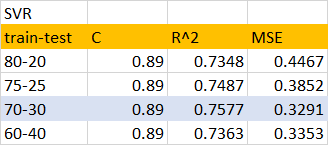

## XGBoosting


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


for i in [0.2,0.25,0.3,0.4]:
  X_train, X_test, y_train, y_test = train_test_split(x_nomulti_colinearity, y, test_size=i, random_state=0)

  # Creating the XGBoost Regressor model
  model = XGBRegressor(max_depth=4,
                       n_estimators=100,
                       subsample=0.0310,

                       random_state=0)

  # Training the model on the training data
  model.fit(X_train, y_train)

  # Predicting on the test data


  y_pred = model.predict(X_train)
  r2 = r2_score(y_train, y_pred)
  print("---------------\n")
  print(f"R^2 Score for the training set {(1-i)*100}% is : {r2.round(4)}")

  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  print(f"R^2 Score for the testing {(i)*100}%  set is : {r2.round(4)}")
  print("Mean squared error:",(metrics.mean_squared_error(y_test, y_pred)).round(3))

---------------

R^2 Score for the training set 80.0% is : 0.7852
R^2 Score for the testing 20.0%  set is : 0.7122
Mean squared error: 0.485
---------------

R^2 Score for the training set 75.0% is : 0.6542
R^2 Score for the testing 25.0%  set is : 0.6465
Mean squared error: 0.542
---------------

R^2 Score for the training set 70.0% is : 0.7017
R^2 Score for the testing 30.0%  set is : 0.5394
Mean squared error: 0.626
---------------

R^2 Score for the training set 60.0% is : 0.736
R^2 Score for the testing 40.0%  set is : 0.5584
Mean squared error: 0.562


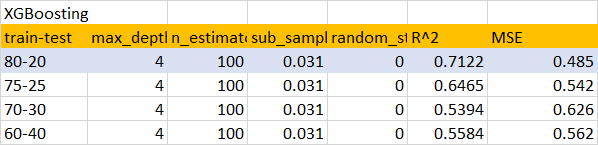

## Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


X=x_nomulti_colinearity=data1.drop(['Country','Urban_population','Birth Rate','Co2-Emissions'],axis=1)
y=data1['Infant mortality']
for i in [0.2,0.25,0.3,0.4]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=0)

  # Creating the Bagging Regressor model with Decision Tree as base estimator
  model = BaggingRegressor(
      base_estimator=DecisionTreeRegressor(),
      n_estimators=99,  # Number of trees in the ensemble
      random_state=42,
      max_samples=0.8, # Fraction of samples to use for each tree
      max_features=4
  )

  # Training the model on the training data
  model.fit(X_train, y_train)

  # Predicting on the test data
  y_pred = model.predict(X_test)

  # Calculating the R² score
  r2 = r2_score(y_test, y_pred)

  # Output the R² score
  print(f'\nR² for test ration {i*100}% score: {r2:.4f}')
  print("Mean squared error:",(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



R² for test ration 20.0% score: 0.8745
Mean squared error: 33.37818726680242


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



R² for test ration 25.0% score: 0.8621
Mean squared error: 44.922776092507114


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



R² for test ration 30.0% score: 0.8661
Mean squared error: 48.88321748593158


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



R² for test ration 40.0% score: 0.8691
Mean squared error: 47.493583361340136


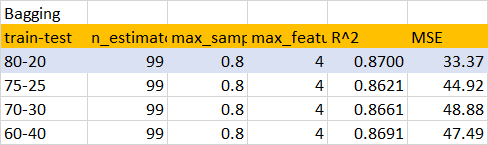